# Solution Planning

## Business Problem

Realizar uma análise exploratória nos dados de vendas da empresa de comércio eletrônico Mahalo, validando algumas hipóteses e respondendo algumas questões de negócio.

Hipóteses para validar:

- H1 - Em média, os produtos mais caros foram vendidos para a região sul.
- H2 - Proporcionalmente, o estado do Rio Grande do Sul compra mais do fornecedor Carlu que os demais.
- H3 - O Lucro dos produtos vendidos no estado do Paraná foi maior, em média, que nos demais estados.
- H4 - Mais de 50% das vendas ocorreram nos finais de semana.

Questões para responder:

- Q1 - Os produtos de diferentes preços venderam de forma homogênea nos diversos marketplaces?
- Q2 - Qual marketplace vendeu os produtos de maior valor?
- Q3 - Qual foi o número de vendas por fornecedor em cada marketplace?
- Q4 - Qual fornecedor mais vendeu para cada região do Brasil?
- Q5 - Qual marketplace mais vendeu para cada região do Brasil?
- Q6 - Qual foi o lucro médio por fornecedor?
- Q7 - Qual foi o número de vendas por trimeste? E por mês?
- Q8 - Qual foi o faturamento por trimeste? E por mês?
- Q9 - Qual foi o lucro por trimeste? E por mês?

## Output

O que vou entregar? / Onde o time de negócio quer ver?

No ciclo 1:
- Relatório exibindo o comportamento geral dos dados na ferramenta de visualização Sweetviz. Será apresentado via nagador Chrome.
- Validação das hipóteses e resposta às questões de negócio dentro do jupyter notebook. Será apresentado no próprio jupyter notebook.

## Input

Fontes de dados:

- Dataset "mahalo_produtosbr_untreated", extraído da planilha de vendas do e-commerce, com dados de 2019 à 2022.   Dados sensíveis serão removidos/anonimizados, e será trabalhado o arquivo: "mahalo_produtosbr_treated".

Ferramentas:
- Python 3.8.12, Jupyter Notebook, git, github

## Process

Tipo de problema:
    Geração de insights via EDA.
    
Principais métodos:
    Tratamento dos dados, feature engeneering e análise exploratória dos dados.

# Environment Preparation

## Imports

In [245]:
import pandas                 as pd
import datetime               as dt
import re
import seaborn                as sns
import matplotlib.pyplot      as plt
from IPython.core.display     import HTML
from tabulate                 import tabulate
import sweetviz               as sv
import hashlib

## Helper Functions

In [217]:
def jupyter_settings():
    """ Optimize general settings, standardize plot sizes, etc. """
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    pd.set_option('display.max_columns', 30)
    pd.set_option('display.max_rows', 30)
jupyter_settings()

# Data Collection

In [6]:
df_untreated = pd.read_csv('../data/raw/mahalo_produtosbr_untreated.csv')

In [7]:
df_untreated[0:0]

,Data Compra,SKU,Produto,Fornecedor,Nº NF\nEntrada,Custo \nBruto\n(NFE),Custo Variável\n(ST+IPI)\n,Custo fixo\n(Sob Preço Venda)\n5%,"Comissões MKP \n(12,8% Magalu)\n(17% ML)",Frete,Imposto Simples\n(4%),Despesas \nOperacionais\n(1%),Preço \nVenda (R$),Margem Lucro \n(10% em R$),Lucro \nObtido (R$),Dias \nno Estoque,Status,Data venda,Marketplace,Cliente,Localização,Observação


# Data Description

## Rename Columns

In [8]:
#1 Renomeia colunas, antes de tudo
df_untreated.columns

Index(['Data Compra', 'SKU', 'Produto', 'Fornecedor', 'Nº NF\nEntrada',
       'Custo \nBruto\n(NFE)', 'Custo Variável\n(ST+IPI)\n',
       'Custo fixo\n(Sob Preço Venda)\n5%',
       'Comissões MKP \n(12,8% Magalu)\n(17% ML)', 'Frete',
       'Imposto Simples\n(4%)', ' Despesas \nOperacionais\n(1%)',
       'Preço \nVenda (R$)', 'Margem Lucro \n(10% em R$)',
       'Lucro \nObtido (R$)', 'Dias \nno Estoque', 'Status', 'Data venda',
       'Marketplace', 'Cliente', 'Localização', 'Observação'],
      dtype='object')

In [12]:
#renomear colunas
df_untreated.columns=['data_compra', 'sku', 'produto', 'fornecedor', 'nfe_entrada',
       'custo_bruto_parcial', 'custo_bruto', 'custo_fixo_venda',
       'comissoes_mktplace', 'frete', 'imposto_simples', 'despesas_operacionais',
       'preco_venda', 'margem_lucro', 'lucro_venda', 'dias_estoque', 'status', 'data_venda',
       'marketplace_venda', 'cliente', 'localizacao', 'observacao']
df_untreated[0:0]

,data_compra,sku,produto,fornecedor,nfe_entrada,custo_bruto_parcial,custo_bruto,custo_fixo_venda,comissoes_mktplace,frete,imposto_simples,despesas_operacionais,preco_venda,margem_lucro,lucro_venda,dias_estoque,status,data_venda,marketplace_venda,cliente,localizacao,observacao


## Data Dimension

In [13]:
print(f'Number of rows: {df_untreated.shape[0]} ')
print(f'Number of columns: {df_untreated.shape[1]} ')

Number of rows: 1529 
Number of columns: 22 


In [15]:
df_untreated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_compra            1529 non-null   object 
 1   sku                    1529 non-null   object 
 2   produto                1529 non-null   object 
 3   fornecedor             1529 non-null   object 
 4   nfe_entrada            840 non-null    float64
 5   custo_bruto_parcial    1529 non-null   object 
 6   custo_bruto            1529 non-null   object 
 7   custo_fixo_venda       1529 non-null   object 
 8   comissoes_mktplace     1529 non-null   object 
 9   frete                  1529 non-null   object 
 10  imposto_simples        1529 non-null   object 
 11  despesas_operacionais  1529 non-null   object 
 12  preco_venda            1529 non-null   object 
 13  margem_lucro           1529 non-null   object 
 14  lucro_venda            1529 non-null   object 
 15  dias

## Data Selection

### Remove status ≠ Vendido

In [16]:
#serão analisados apenas os produtos de status VENDIDO, logo os DEVOLVIDO AO FORNECEDOR e COMPRADO PELOS SÓCIOS serão descartados. Estes dois últimos totalizam apenas 20 registros.
df_untreated = df_untreated.loc[ df_untreated['status'] == 'Vendido' ]

In [23]:
#ok
df_untreated.shape[0]

1509

In [22]:
#resetar indice, pois tínhamos 1528 vendas, e agora 1509:
df_untreated = df_untreated.reset_index(drop=True)

### Select Columns

In [19]:
#selecionando colunas a remover:
cols_drop = [ 'nfe_entrada', 'custo_bruto_parcial', 'custo_fixo_venda', 'imposto_simples', 'despesas_operacionais', 'margem_lucro', 'status', 'observacao']

In [20]:
#remover colunas
df_untreated = df_untreated.drop(cols_drop, axis=1).copy()

In [24]:
#conferir
df_untreated[0:0]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao


### Anonymize cliente

In [33]:
df_untreated['cliente'][0:0]

Series([], Name: cliente, dtype: object)

In [35]:
#converter coluna para string
df_untreated['cliente'] = df_untreated['cliente'].astype(str)

In [36]:
#transformar tudo para upper case
df_untreated['cliente'] = df_untreated['cliente'].apply( lambda x : x.upper() )

In [56]:
#anonimizar o nome do cliente, transformando em um código de 12 caracteres. 
#Caso o nome do cliente se repita, o código gerado será o mesmo, o que garante a manutenção do contexto, permitindo avaliar compras por cliente por exemplo.
df_untreated['cliente'] = df_untreated['cliente'].apply( lambda x : hashlib.sha256(str.encode( x )).hexdigest()[0:20] )

In [58]:
#tudo ok!
df_untreated['cliente'].value_counts()

deb6ab246f9e38f77946    25
d25f2832a24ea6a54965    19
0de49c518ec01b6da056    11
0e784327b848bec73bad     6
9300758c0292990baf94     6
                        ..
17223651738c724d2ac3     1
2260d389e2aa3d42ab7b     1
7f9119e6ab5a9574300e     1
7113e895b8e2fc2d6f4d     1
aa0fb5b2a28eda402dfc     1
Name: cliente, Length: 1301, dtype: int64

In [60]:
#exibindo dados do dataset já com clientes anonimizados
df_untreated.sample(2)

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
749,11/02/21,19969,ESCOVA SECADOR MONDIAL ES-07 127V RED,FUJIOKA,"134,33","37,38","0,00","219,90","46,93",29,12/03/21,MAGALU,02086e72860dd5146919,"ITUIUTABA, MG"
1335,06/08/21,DMR5546,PATINETE 2 EM 1 JOANINHA ROSA,DM TOYS,"245,34","23,29","0,00","181,93","- 104,89",193,15/02/22,MAGALU,b7f295be438fd637f0ea,ITAJAI SC


In [61]:
df_untreated.dtypes

data_compra           object
sku                   object
produto               object
fornecedor            object
custo_bruto           object
comissoes_mktplace    object
frete                 object
preco_venda           object
lucro_venda           object
dias_estoque          object
data_venda            object
marketplace_venda     object
cliente               object
localizacao           object
dtype: object

In [62]:
df_untreated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   data_compra         1509 non-null   object
 1   sku                 1509 non-null   object
 2   produto             1509 non-null   object
 3   fornecedor          1509 non-null   object
 4   custo_bruto         1509 non-null   object
 5   comissoes_mktplace  1509 non-null   object
 6   frete               1509 non-null   object
 7   preco_venda         1509 non-null   object
 8   lucro_venda         1509 non-null   object
 9   dias_estoque        1509 non-null   object
 10  data_venda          1509 non-null   object
 11  marketplace_venda   1508 non-null   object
 12  cliente             1509 non-null   object
 13  localizacao         1488 non-null   object
dtypes: object(14)
memory usage: 165.2+ KB


In [63]:
#exportar csv que será usado no projeto
df_untreated.to_csv('../data/processed/df0_treated.csv')

## Feature Description

In [66]:
#importar csv 
df1 = pd.read_csv('../data/processed/df0_treated.csv', index_col=0)
df1.sample(1)

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
1458,18/09/21,19696,APARADOR MONDIAL BG-03 10 EM 1 BIV 2,FUJIOKA,"108,1","22,24","22,14","130,82","- 34,74",142,07/02/22,ML MHL TOOLS,a5ef89a9a8fc0d65889b,"Araraquara, São Paulo"


In [237]:
# Explicar o que cada coluna significa
tab_meanings = [['Coluns', 'Significado'],
        ['data_compra', 'data de emissão da NFE de compra dos produtos'],
        ['sku', 'código SKU do produto, sendo SKU seu código de controle de estoque'],
        ['produto', 'nome do produto'],
        ['fornecedor', 'nome do fornecedor'],
        ['custo_bruto', 'composto pelo custo_bruto_nfe + frete SIF (pago pelo comprador) rateado pelos produtos, quando aplicável + valor de impostos IPI e ST'],
        ['comissoes_mktplace', 'comissões pagas aos marketplaces para venda dos produtos'],
        ['frete', 'custos com fretes para envio dos produtos, quando zerado, está imbutido na comissão'],
        ['preco_venda', 'preço pelo qual o produto foi vendido'],
        ['lucro_venda', 'lucro ou prejuízo (se valor negativo), obtido na venda do produto'],
        ['dias_estoque', 'número de dias que o produto ficou em estoque'],
        ['data_venda', 'data da venda do produto'],
        ['marketplace_venda', 'marketplaces no qual o produto foi vendido, exceto quando valor for "entrega em mãos"'],
        ['cliente', 'nome do cliente anonimizado'],
        ['localizacao', 'UF do cliente']
      ]
print(tabulate(tab_meanings, headers='firstrow', stralign='left', tablefmt='simple'))

Coluns              Significado
------------------  -------------------------------------------------------------------------------------------------------------------------------------
data_compra         data de emissão da NFE de compra dos produtos
sku                 código SKU do produto, sendo SKU seu código de controle de estoque
produto             nome do produto
fornecedor          nome do fornecedor
custo_bruto         composto pelo custo_bruto_nfe + frete SIF (pago pelo comprador) rateado pelos produtos, quando aplicável + valor de impostos IPI e ST
comissoes_mktplace  comissões pagas aos marketplaces para venda dos produtos
frete               custos com fretes para envio dos produtos, quando zerado, está imbutido na comissão
preco_venda         preço pelo qual o produto foi vendido
lucro_venda         lucro ou prejuízo (se valor negativo), obtido na venda do produto
dias_estoque        número de dias que o produto ficou em estoque
data_venda          data da venda do prod

## Data Type Convertion + Standardization

In [ ]:
#converter os tipos de dados adequadamente, e padronizá-los

In [68]:
#tipos atuais
df1.dtypes

data_compra           object
sku                   object
produto               object
fornecedor            object
custo_bruto           object
comissoes_mktplace    object
frete                 object
preco_venda           object
lucro_venda           object
dias_estoque          object
data_venda            object
marketplace_venda     object
cliente               object
localizacao           object
dtype: object

### Datas

##### data_compra

In [70]:
#converter campo data_compra de object para date:
df1['data_compra'] = pd.to_datetime(df1['data_compra'], dayfirst=True)  

In [71]:
#resolvido:
df1['data_compra'].dtypes

dtype('<M8[ns]')

##### data_venda

In [246]:
#converter campo data_venda de object para date:

##df1['data_venda'] = pd.to_datetime(df1['data_venda'], dayfirst=True) 
##ParserError: Unknown string format: Erro estoque 

In [73]:
#encontrar a linha com o 'Erro estoque'
df1.loc[df1['data_venda'] == 'Erro estoque'  ]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
235,2020-07-16,54992POLAZUPEQ,CAMISA POLO MASCULINA AUTHENTIC COM DETALHES E...,MMT,"14,4","3,98","0,00","19,90","- 0,47",#VALUE!,Erro estoque,NaN,0e784327b848bec73bad,NaN


In [75]:
#deletar a linha incorreta, cujo produto não existe no estoque
df1 = df1.drop(235)

In [77]:
#resetar índices, pois ficou falhando 1 linha
df1 = df1.reset_index(drop=True)

In [82]:
#conferir
df1.loc[235:235]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
235,2020-07-16,56262BERAZUPEQ,BERMUDA MOLETOM MOLETINHO BRUXELAS PLAQ COURO ...,MMT,"18,33","2,68","0,00","14,90","- 7,60",523,21/12/21,SHOPEE,bf71b12f6eab600cbbbc,"Mirassol D'Oeste, Mato Grosso"


In [84]:
#deve ter agora 1508 linhas (tinha 1509)
df1.shape[0]

1508

In [247]:
#novamente, converter campo data_venda de object para date:

## df1['data_venda'] = pd.to_datetime(df1['data_venda'], dayfirst=True) 
## ParserError: Unknown string format: 10/202/2022 

In [99]:
#corrigir (assumindo 10/02/22)
df1.loc[df1['data_venda'] == '220/02/2022', 'data_venda'] = '10/02/2022'

In [96]:
#conferir
df1.loc[df1['data_venda'] == '10/02/2022' ]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
1115,2021-06-11,691068,ESCOVA SECADORA GAMA STYLISH BRUSH 127V,FUJIOKA,"185,01","39,08","18,45","229,9","- 35,63",#VALUE!,10/02/2022,ML MHL TOOLS,4aabba410b225dfb9083,"Franca, São Paulo"


In [248]:
#novamente, tentar converter a data_venda para date: 

## df1['data_venda'] = pd.to_datetime(df1['data_venda'], dayfirst=True) 
## ParserError: Unknown string format: 10/202/2022

In [102]:
#localizar a data problemática e corrigir atribuindo 10/02/2022
df1.loc[df1['data_venda'] == '10/202/2022' , 'data_venda'] = '10/02/2022'

In [103]:
#conferir
df1.loc[df1['data_venda'] == '10/02/2022' ]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
1085,2021-05-19,19697,APARADOR MONDIAL BG-04 6 EM 1,FUJIOKA,"99,76","12,54","0,00","97,93","- 24,16",#VALUE!,10/02/2022,MAGALU,5d5bb0ce2980b89ce733,AGUDOS SP
1115,2021-06-11,691068,ESCOVA SECADORA GAMA STYLISH BRUSH 127V,FUJIOKA,"185,01","39,08","18,45","229,9","- 35,63",#VALUE!,10/02/2022,ML MHL TOOLS,4aabba410b225dfb9083,"Franca, São Paulo"


In [105]:
#nova tentativa de converter a data_venda para date: (agora ok!)
df1['data_venda'] = pd.to_datetime(df1['data_venda'], dayfirst=True) 

In [106]:
#conferir conversão
df1['data_venda'].dtypes

dtype('<M8[ns]')

In [108]:
#conferir conversão de ambas as datas
df1.dtypes

data_compra           datetime64[ns]
sku                           object
produto                       object
fornecedor                    object
custo_bruto                   object
comissoes_mktplace            object
frete                         object
preco_venda                   object
lucro_venda                   object
dias_estoque                  object
data_venda            datetime64[ns]
marketplace_venda             object
cliente                       object
localizacao                   object
dtype: object

### Features Monetárias

##### custo_bruto

In [110]:
df1['custo_bruto']

0        94,09
1        10,23
2         43,8
3        66,06
4        61,32
         ...  
1503     115,2
1504     115,2
1505     115,2
1506    118,45
1507    118,45
Name: custo_bruto, Length: 1508, dtype: object

In [111]:
# converter para o formato americano, com ponto no lugar da vírgula
df1['custo_bruto'] = df1['custo_bruto'].apply ( lambda x : x.replace(',','.') )
df1['custo_bruto']

0        94.09
1        10.23
2         43.8
3        66.06
4        61.32
         ...  
1503     115.2
1504     115.2
1505     115.2
1506    118.45
1507    118.45
Name: custo_bruto, Length: 1508, dtype: object

In [112]:
#converter para float
df1['custo_bruto']  = df1['custo_bruto'] .astype(float)
df1['custo_bruto'] .dtypes

dtype('float64')

##### comissoes_mktplace

In [192]:
df1['comissoes_mktplace'].head()

0     0,00
1     7,74
2    15,86
3    15,86
4    18,90
Name: comissoes_mktplace, dtype: object

In [113]:
# converter para o formato americano, com ponto ao invés de vírgura
df1['comissoes_mktplace'] = df1['comissoes_mktplace'].apply ( lambda x : x.replace(',','.') )
df1['comissoes_mktplace'].head()

0     0.00
1     7.74
2    15.86
3    15.86
4    18.90
Name: comissoes_mktplace, dtype: object

In [114]:
#converter para float
df1['comissoes_mktplace'] = df1['comissoes_mktplace'].astype(float)
df1['comissoes_mktplace'].dtypes

dtype('float64')

##### frete

In [116]:
# converter para o formato americano, com ponto ao invés de vírgura
df1['frete'] = df1['frete'].apply ( lambda x : x.replace(',','.') )
df1['frete'].head()

0       0
1       0
2    5.65
3    5.65
4       0
Name: frete, dtype: object

In [117]:
#converter para float
df1['frete'] = df1['frete'].astype(float)
df1['frete'].dtypes

dtype('float64')

##### preco_venda

In [118]:
df1['preco_venda'].head()

0      130
1     24,9
2    79,43
3     99,9
4     86,9
Name: preco_venda, dtype: object

In [120]:
# converter para o formato americano, com ponto ao invés de vírgura
df1['preco_venda'] = df1['preco_venda'].apply ( lambda x : x.replace(',','.') )
df1['preco_venda'].head()

0      130
1     24.9
2    79.43
3     99.9
4     86.9
Name: preco_venda, dtype: object

In [249]:
#converter para float
#em valores maiores que 1k, temos problemas, pois vai ficar com dois zeros (1.139.90).. usar regex para remover o primeiro ponto

## df1['preco_venda'] = df1['preco_venda'].astype(float)
## ValueError: could not convert string to float: '1.139.90' 

In [126]:
#encontrar exemplos de 1k+
df1.loc[df1['preco_venda'] == '1.139.90' ]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
584,2020-08-28,6045247032,MARTELETE PERF/ROMP HR2470 220V MAKITA,OVD,746.72,216.58,26.39,1.139.90,"148,74",409,2021-10-11,OLIST,350481cd4914e8132f94,Bento Gonçalves - RS
598,2020-08-26,6045333042,PARAFUS/FUR.BAT IMP 12V HP333DWYE MAKIT,OVD,786.70,216.58,26.39,1.139.90,"112,75",335,2021-07-27,OLIST,25ca80061b37c2a9afe5,Colíder - MT


In [130]:
# usar REGEX com APPLY + LAMBDA
df1['preco_venda'] = df1['preco_venda'].apply(lambda x : x.replace('.', '', 1) if re.match('(\d)[.](\d{3})', x ) else x)

In [131]:
# conferir se funcionou 
print(df1['preco_venda'][584])
print(df1['preco_venda'][598])

1139.90
1139.90


In [133]:
#converter para float
df1['preco_venda'] = df1['preco_venda'].astype(float)
df1['preco_venda'].dtypes

dtype('float64')

##### lucro_venda

In [250]:
df1['lucro_venda'].head()

In [136]:
# converter para o formato americano, com ponto ao invés de vírgula
df1['lucro_venda'] = df1['lucro_venda'].apply ( lambda x : x.replace(',','.') )
df1['lucro_venda'].head(10)

0    35.75
1     5.78
2    11.57
3    10.21
4     5.22
5     6.76
6     6.76
7     6.76
8     5.93
9     5.93
Name: lucro_venda, dtype: object

In [251]:
#converter para float

## df1['lucro_venda'] = df1['lucro_venda'].astype(float)
## df1['lucro_venda'].dtypes
## ValueError: could not convert string to float: '- 4.63'

In [138]:
#resolver com startswith
lucro_liq = '- 4.63'
lucro_liq.startswith('- ')

True

In [139]:
#remover o espaço antes do sinal negativo:
df1['lucro_venda'] = df1['lucro_venda'].apply( lambda x : x.replace('- ','-') )

In [140]:
#conferir
df1['lucro_venda']

0        35.75
1         5.78
2        11.57
3        10.21
4         5.22
         ...  
1503     15.96
1504     15.96
1505     15.96
1506     12.71
1507    -26.64
Name: lucro_venda, Length: 1508, dtype: object

In [141]:
#converter para float
df1['lucro_venda'] = df1['lucro_venda'].astype(float)
df1['lucro_venda'].dtypes

dtype('float64')

In [144]:
df1.dtypes

data_compra           datetime64[ns]
sku                           object
produto                       object
fornecedor                    object
custo_bruto                  float64
comissoes_mktplace           float64
frete                        float64
preco_venda                  float64
lucro_venda                  float64
dias_estoque                  object
data_venda            datetime64[ns]
marketplace_venda             object
cliente                       object
localizacao                   object
dtype: object

### Demais Features

##### produto

In [147]:
#seu tipo seguirá como objeto
df1['produto']

0                CX FERRAM METALICA/PLAST CMV 0380 VONDER
1                TESOURA USO GERAL 25CM VONDER 8213.00.00
2             ALIC UNIVERSAL 8" 219022B BELZER 8203.20.10
3       ALIC BICO M.CANA TELEF.8132 IOX-8"GEDORE 8203....
4                   ALIC CORTE DIAGONAL 6" 219024B BELZER
                              ...                        
1503                   APARADOR MONDIAL BG-05 11 EM 1 BIV
1504                   APARADOR MONDIAL BG-05 11 EM 1 BIV
1505                   APARADOR MONDIAL BG-05 11 EM 1 BIV
1506                 APARADOR PHILIPS ONE BLADE QP2510/15
1507                 APARADOR PHILIPS ONE BLADE QP2510/15
Name: produto, Length: 1508, dtype: object

In [148]:
#garantir que todos os produtos estão em UPPER CASE
df1['produto'] = df1['produto'].apply( lambda x : x.upper() )

##### fornecedor

In [149]:
#conferir 
df1['fornecedor'].value_counts()
#sem necessidade de upper case, nem conversão de tipo, manter como está

FUJIOKA        459
OVD            285
MMT            285
CARLU          180
YESTOYS         87
NILO TOZZO      45
BAIP            44
DM TOYS         43
XALINGO         41
NOVABRINK       20
ZEIN IMPORT      9
WURTH            5
MAHALO           5
Name: fornecedor, dtype: int64

##### dias_estoque

In [155]:
df1['dias_estoque'].head()

0    331
1    157
2    380
3    380
4    266
Name: dias_estoque, dtype: object

In [252]:
#converter para int

## df1['dias_estoque'] = df1['dias_estoque'].astype(int)
## ValueError: invalid literal for int() with base 10: '#NUM!'

In [154]:
#encontrar valores não inteiros citados
df1.loc[df1['dias_estoque'] == '#NUM!' ]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
664,2020-11-18,6001018127,SOPRADOR TERMICO STV1800 DIGITAL 127V VD,OVD,366.11,62.68,18.95,369.9,-114.83,#NUM!,2000-02-14,ML MHL TOOLS,c28245847dd3b7d40ab9,"Cuiabá, Mato Grosso"


In [ ]:
#data de venda estava incorreta: 2000-02-14 seria 2021-02-14
#dias estoque deve conter então 88 dias

In [157]:
#correção data:
df1.loc[df1['data_venda'] == '2000-02-14' , 'data_venda'] = '2021-02-14' 
df1.loc[df1['data_venda'] == '2021-02-14' ]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
664,2020-11-18,6001018127,SOPRADOR TERMICO STV1800 DIGITAL 127V VD,OVD,366.11,62.68,18.95,369.9,-114.83,#NUM!,2021-02-14,ML MHL TOOLS,c28245847dd3b7d40ab9,"Cuiabá, Mato Grosso"


In [158]:
#correção estoque:
df1.loc[df1['dias_estoque'] == '#NUM!', 'dias_estoque'] = 88
df1['dias_estoque'][664]

88

In [253]:
#converter para int

## df1['dias_estoque'] = df1['dias_estoque'].astype(int)
## ValueError: invalid literal for int() with base 10: '- 14,39'

In [161]:
#encontrar o erro:
df1.loc[df1['dias_estoque'] == '- 14,39', 'dias_estoque']

860    - 14,39
Name: dias_estoque, dtype: object

In [163]:
df1[860:861]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
860,2019-09-13,3013,PALAVRAS CRUZADAS 73 PC - 3013,CARLU,15.99,0.0,0.0,15.99,0.0,"- 14,39",2021-12-19,Entregue em mãos,0de49c518ec01b6da056,Toledo/PR


In [ ]:
#data_venda foi 2021-12-19, e data_compra foi 2019-09-13, logo o correto em dias_estoque é 828

In [164]:
#corrigir:
df1.loc[df1['dias_estoque'] == '- 14,39', 'dias_estoque'] = 828

In [165]:
df1['dias_estoque'][860]

828

In [254]:
#tentar novamente converter para int

## df1['dias_estoque'] = df1['dias_estoque'].astype(int)
## ValueError: invalid literal for int() with base 10: '#VALUE!'

In [167]:
#encontrar onde está como '#VALUE!'
df1.loc[df1['dias_estoque'] == '#VALUE!', 'dias_estoque']

1085    #VALUE!
1115    #VALUE!
Name: dias_estoque, dtype: object

In [169]:
#caso 1
df1.loc[1085:1085]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
1085,2021-05-19,19697,APARADOR MONDIAL BG-04 6 EM 1,FUJIOKA,99.76,12.54,0.0,97.93,-24.16,#VALUE!,2022-02-10,MAGALU,5d5bb0ce2980b89ce733,AGUDOS SP


In [170]:
#corrigir valor do caso 1 para 267 dias
df1.loc[1085:1085, 'dias_estoque'] = 267

In [172]:
df1.loc[1085:1085]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
1085,2021-05-19,19697,APARADOR MONDIAL BG-04 6 EM 1,FUJIOKA,99.76,12.54,0.0,97.93,-24.16,267,2022-02-10,MAGALU,5d5bb0ce2980b89ce733,AGUDOS SP


In [175]:
#caso 2
df1.loc[1115:1115]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
1115,2021-06-11,691068,ESCOVA SECADORA GAMA STYLISH BRUSH 127V,FUJIOKA,185.01,39.08,18.45,229.9,-35.63,#VALUE!,2022-02-10,ML MHL TOOLS,4aabba410b225dfb9083,"Franca, São Paulo"


In [176]:
#corrigir valor do caso 2 para 254 dias
df1.loc[1115:1115, 'dias_estoque'] = 254

In [177]:
df1.loc[1115:1115]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
1115,2021-06-11,691068,ESCOVA SECADORA GAMA STYLISH BRUSH 127V,FUJIOKA,185.01,39.08,18.45,229.9,-35.63,254,2022-02-10,ML MHL TOOLS,4aabba410b225dfb9083,"Franca, São Paulo"


In [178]:
#tentar converter novamente para int
df1['dias_estoque'] = df1['dias_estoque'].astype(int)
df1['dias_estoque'].dtypes

dtype('int64')

##### marketplace_venda 

In [194]:
df1['marketplace_venda'].value_counts()

MAGALU                                                                  598
ML MHL TOOLS                                                            261
SHOPEE                                                                  249
ML ALEGRISHOP                                                           128
OLIST                                                                   106
ML MHL CARE                                                              44
ML MAHALO TOOLS                                                          32
Entregue em mãos                                                         19
Entrega em mãos                                                          10
Direta ao cliente                                                         9
B2W                                                                       8
Entregue em Mãos                                                          6
MHL TOOLS                                                                 5
Olist       

In [255]:
#transformar tudo em upper

## df1['marketplace_venda'] = df1['marketplace_venda'].apply( lambda x : x.upper() )
## AttributeError: 'float' object has no attribute 'upper'

In [197]:
#converter tudo para string (obj)
df1['marketplace_venda'] = df1['marketplace_venda'].astype(str) #object

In [198]:
#tentar novamente transformar tudo em upper
df1['marketplace_venda'] = df1['marketplace_venda'].apply( lambda x : x.upper() )

In [199]:
df1['marketplace_venda'].value_counts()

MAGALU                                                                  601
ML MHL TOOLS                                                            261
SHOPEE                                                                  253
ML ALEGRISHOP                                                           128
OLIST                                                                   111
ML MHL CARE                                                              44
ML MAHALO TOOLS                                                          32
ENTREGUE EM MÃOS                                                         26
ENTREGA EM MÃOS                                                          11
DIRETA AO CLIENTE                                                         9
B2W                                                                       8
MHL TOOLS                                                                 5
DIRETO AO CLIENTE                                                         4
MERCADO LIVR

In [200]:
#corrigir, padronizando o marketplace de venda
#ML MHL TOOLS <- ML MAHALO TOOLS, MHL TOOLS, MERCADO LIVRE, MAHALO, ML MAHALO
df1.loc[ df1['marketplace_venda'] == 'ML MAHALO TOOLS', 'marketplace_venda' ] = 'ML MHL TOOLS'
df1.loc[ df1['marketplace_venda'] == 'MHL TOOLS', 'marketplace_venda' ] = 'ML MHL TOOLS'
df1.loc[ df1['marketplace_venda'] == 'MERCADO LIVRE', 'marketplace_venda' ] = 'ML MHL TOOLS'
df1.loc[ df1['marketplace_venda'] == 'MAHALO', 'marketplace_venda' ] = 'ML MHL TOOLS'
df1.loc[ df1['marketplace_venda'] == 'ML MAHALO', 'marketplace_venda' ] = 'ML MHL TOOLS'

In [201]:
#sequência na correção
#ENTREGUE EM MÃOS <- ENTREGA EM MÃOS, DIRETA AO CLIENTE, DIRETO AO CLIENTE, LOCAL, PRESENCIAL, EM MÃOS, ENTREGUE EM MÃOS, DIRETA PARA MAHALO, PARA CONSERTO DA FURADEIRA QUE VOLTOU DE CLIENTE, NAN
df1.loc[ df1['marketplace_venda'] == 'ENTREGA EM MÃOS', 'marketplace_venda' ] = 'ENTREGUE EM MÃOS'
df1.loc[ df1['marketplace_venda'] == 'DIRETA AO CLIENTE', 'marketplace_venda' ] = 'ENTREGUE EM MÃOS'
df1.loc[ df1['marketplace_venda'] == 'DIRETO AO CLIENTE', 'marketplace_venda' ] = 'ENTREGUE EM MÃOS'
df1.loc[ df1['marketplace_venda'] == 'LOCAL', 'marketplace_venda' ] = 'ENTREGUE EM MÃOS'
df1.loc[ df1['marketplace_venda'] == 'PRESENCIAL', 'marketplace_venda' ] = 'ENTREGUE EM MÃOS'
df1.loc[ df1['marketplace_venda'] == 'EM MÃOS', 'marketplace_venda' ] = 'ENTREGUE EM MÃOS'
df1.loc[ df1['marketplace_venda'] == 'DIRETA PARA MAHALO, PARA CONSERTO DA FURADEIRA QUE VOLTOU DE CLIENTE', 'marketplace_venda' ] = 'ENTREGUE EM MÃOS'
df1.loc[ df1['marketplace_venda'] == 'NAN', 'marketplace_venda' ] = 'ENTREGUE EM MÃOS'

In [204]:
df1['marketplace_venda'].value_counts()

MAGALU                               601
ML MHL TOOLS                         304
SHOPEE                               253
ML ALEGRISHOP                        128
OLIST                                111
ENTREGUE EM MÃOS                      56
ML MHL CARE                           44
B2W                                    8
ACERTO DE ESTOQUE CONFORME BLING       2
ACERTO DE ESTOQUE CONFORME BLING.      1
Name: marketplace_venda, dtype: int64

In [209]:
#Remover:
#    'ACERTO DE ESTOQUE CONFORME BLING'
#    'ACERTO DE ESTOQUE CONFORME BLING.'

In [210]:
#caso 1
df1.loc[ df1['marketplace_venda'] == 'ACERTO DE ESTOQUE CONFORME BLING', 'marketplace_venda' ]

288    ACERTO DE ESTOQUE CONFORME BLING
302    ACERTO DE ESTOQUE CONFORME BLING
Name: marketplace_venda, dtype: object

In [214]:
#remover ambas as linhas do caso 1:
df1 = df1.drop(288)
df1 = df1.drop(302)

In [216]:
#conferir
df1.loc[ df1['marketplace_venda'] == 'ACERTO DE ESTOQUE CONFORME BLING', 'marketplace_venda' ]

Series([], Name: marketplace_venda, dtype: object)

In [217]:
#caso 2
df1.loc[ df1['marketplace_venda'] == 'ACERTO DE ESTOQUE CONFORME BLING.', 'marketplace_venda' ]

379    ACERTO DE ESTOQUE CONFORME BLING.
Name: marketplace_venda, dtype: object

In [219]:
##remover a linha do caso 2:
df1 = df1.drop(379)

In [220]:
#conferir
df1.loc[ df1['marketplace_venda'] == 'ACERTO DE ESTOQUE CONFORME BLING.', 'marketplace_venda' ]

Series([], Name: marketplace_venda, dtype: object)

In [221]:
#resetar índices
df1 = df1.reset_index(drop=True)

In [227]:
#conferir indices (ok)
df1.shape[0]

1505

In [228]:
#verificar como ficou
df1['marketplace_venda'].value_counts()
#ok

MAGALU              601
ML MHL TOOLS        304
SHOPEE              253
ML ALEGRISHOP       128
OLIST               111
ENTREGUE EM MÃOS     56
ML MHL CARE          44
B2W                   8
Name: marketplace_venda, dtype: int64

##### localizacao

###### registos sem localização

In [232]:
#primeiramente, conferir e resolver os registros sem localização
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data_compra         1505 non-null   datetime64[ns]
 1   sku                 1505 non-null   object        
 2   produto             1505 non-null   object        
 3   fornecedor          1505 non-null   object        
 4   custo_bruto         1505 non-null   float64       
 5   comissoes_mktplace  1505 non-null   float64       
 6   frete               1505 non-null   float64       
 7   preco_venda         1505 non-null   float64       
 8   lucro_venda         1505 non-null   float64       
 9   dias_estoque        1505 non-null   int64         
 10  data_venda          1505 non-null   datetime64[ns]
 11  marketplace_venda   1505 non-null   object        
 12  cliente             1505 non-null   object        
 13  localizacao         1485 non-null   object      

In [233]:
#verificar quais as vendas estão sem localização :
df1.loc[ df1['localizacao'].isna() == True ]

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
107,2020-06-17,7898505865261,"TESOURA 7,5"" MULTIUSO IDEA ID-9475T",BAIP,8.67,1.04,0.00,8.00,-2.51,243,2021-02-15,ENTREGUE EM MÃOS,deb6ab246f9e38f77946,NaN
287,2020-07-16,54992POLPETMED,CAMISA POLO MASCULINA AUTHENTIC COM DETALHES E...,MMT,14.40,0.00,0.00,23.92,8.87,235,2021-03-08,SHOPEE,0e784327b848bec73bad,NaN
300,2020-07-16,54992POLPETGRA,CAMISA POLO MASCULINA AUTHENTIC COM DETALHES E...,MMT,14.40,0.00,0.00,23.92,8.87,235,2021-03-08,SHOPEE,0e784327b848bec73bad,NaN
376,2020-07-16,56265BERAZUGG,BERMUDA MOLETOM MOLETINHO BRUXELAS ESTAMPADA M...,MMT,21.58,12.58,0.00,39.90,4.41,190,2021-01-22,ENTREGUE EM MÃOS,0e784327b848bec73bad,NaN
543,2020-07-30,6065900222,ESMERILHADEIRA 9002JQ 115MM 220V SKIL,OVD,193.64,47.98,17.45,299.90,40.16,103,2020-11-10,ML MHL TOOLS,0e784327b848bec73bad,NaN
578,2020-08-28,6878136000,INVERSOR DIG RIV136 BIVOLT VONDER,OVD,627.39,140.60,15.98,869.90,90.56,77,2020-11-13,MAGALU,7f6889ce60f7cce2e038,NaN
591,2020-08-26,6105136000,MALETA PLAST P/ INVERSOR DIG RIV136 VD,OVD,81.22,24.28,15.98,159.90,34.77,79,2020-11-13,ML MHL TOOLS,7f6889ce60f7cce2e038,NaN
608,2020-08-28,19950,MAQ.DE CORTE WAHL DELUXE GROOMPRO 220V 3,FUJIOKA,216.15,62.88,0.00,369.90,87.77,83,2020-11-19,MAGALU,df3630c44b917099cac9,NaN
624,2020-09-08,6001020220,SOPRADOR TERMICO STV2000N 220V VONDER,OVD,164.52,42.48,17.45,249.90,25.21,34,2020-10-12,ML MHL TOOLS,3c7abac2a82976658bf8,NaN
728,2020-11-18,5361000080,"BROCA P/CONCRETO 8,0 MM VONDER",OVD,7.16,0.00,0.00,7.16,0.09,1,2020-11-18,ML MHL TOOLS,0e784327b848bec73bad,NaN


In [244]:
#buscar identificar se estes clientes já compraram outras vezes, e há registro de localização. A localização poderia ser inferida, mas corre-se o risco de ainda assim estar incorreta por ter mudado. 
df1.loc[ df1['cliente'] == 'df3630c44b917099cac9']

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,localizacao
608,2020-08-28,19950,MAQ.DE CORTE WAHL DELUXE GROOMPRO 220V 3,FUJIOKA,216.15,62.88,0.0,369.9,87.77,83,2020-11-19,MAGALU,df3630c44b917099cac9,NaN


In [246]:
#dado o cenário, vamos remover estes 20 registros
df1 = df1.loc[ df1['localizacao'].isna() == False ]

In [248]:
#resetar indice
df1 = df1.reset_index(drop=True)

In [252]:
#tudo ok!
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data_compra         1485 non-null   datetime64[ns]
 1   sku                 1485 non-null   object        
 2   produto             1485 non-null   object        
 3   fornecedor          1485 non-null   object        
 4   custo_bruto         1485 non-null   float64       
 5   comissoes_mktplace  1485 non-null   float64       
 6   frete               1485 non-null   float64       
 7   preco_venda         1485 non-null   float64       
 8   lucro_venda         1485 non-null   float64       
 9   dias_estoque        1485 non-null   int64         
 10  data_venda          1485 non-null   datetime64[ns]
 11  marketplace_venda   1485 non-null   object        
 12  cliente             1485 non-null   object        
 13  localizacao         1485 non-null   object      

###### extrair UF

In [257]:
#exportar até aqui para csv e fazer backup
df1.to_csv('../data/processed/df1_location_partial.csv')
df1_bk = df1.copy()

In [258]:
#overview
df1['localizacao']

0                Cafelândia, PR
1          São Paulo, São Paulo
2                    Irapuã, SP
3                    Irapuã, SP
4       Niterói, Rio de Janeiro
                 ...           
1480          RIBEIRAO PRETO SP
1481                SAO JOSE SC
1482               GUAPOREMA PR
1483               APUCARANA PR
1484              SANTA ROSA RS
Name: localizacao, Length: 1485, dtype: object

In [259]:
#primeiramente, converter tudo para upper case
df1['localizacao'] = df1['localizacao'].apply(lambda x : x.upper() )
df1['localizacao']

0                CAFELÂNDIA, PR
1          SÃO PAULO, SÃO PAULO
2                    IRAPUÃ, SP
3                    IRAPUÃ, SP
4       NITERÓI, RIO DE JANEIRO
                 ...           
1480          RIBEIRAO PRETO SP
1481                SAO JOSE SC
1482               GUAPOREMA PR
1483               APUCARANA PR
1484              SANTA ROSA RS
Name: localizacao, Length: 1485, dtype: object

In [260]:
#converter também tudo para string
df1['localizacao'] = df1['localizacao'].astype(str)

In [261]:
#limpar espaços em branco antes e depois da string localização
df1['localizacao'] = df1['localizacao'].apply( lambda x : x.strip() )

In [263]:
df1['localizacao']

0                CAFELÂNDIA, PR
1          SÃO PAULO, SÃO PAULO
2                    IRAPUÃ, SP
3                    IRAPUÃ, SP
4       NITERÓI, RIO DE JANEIRO
                 ...           
1480          RIBEIRAO PRETO SP
1481                SAO JOSE SC
1482               GUAPOREMA PR
1483               APUCARANA PR
1484              SANTA ROSA RS
Name: localizacao, Length: 1485, dtype: object

In [264]:
#cria novo dataset 'df_geo', dividindo em colunas ao encontrar pela 1ª vez os caracteres: ","  "/"  "-"
df_geo = df1['localizacao'].str.split('^(.*?),|^(.*?)\/|^(.*?)-', expand=True)

In [265]:
#renomear colunas cidade e UF
df_geo = df_geo.rename(columns={0:'UM', 1:'CIDADE', 2:'DOIS', 3:'TRES', 4:'UF' })

In [266]:
#conferir tamanho (ok)
df_geo.shape

(1485, 5)

In [267]:
#conferir nomes colunas
df_geo.head()

,UM,CIDADE,DOIS,TRES,UF
0,,CAFELÂNDIA,None,None,PR
1,,SÃO PAULO,None,None,SÃO PAULO
2,,IRAPUÃ,None,None,SP
3,,IRAPUÃ,None,None,SP
4,,NITERÓI,None,None,RIO DE JANEIRO


In [271]:
#identificar uma amostra de casos onde UF não ficou na coluna UF:
df_geo[60:90]

,UM,CIDADE,DOIS,TRES,UF
60,,SÃO JOSÉ DOS CAMPOS,None,None,SÃO PAULO
61,,MONTE SIÃO,None,None,MINAS GERAIS
62,,ICARAÍ,None,None,NITERÓI - RJ
63,,SÃO JOSÉ DO RIO PRETO,None,None,SÃO PAULO
64,,SÃO MIGUEL DO IGUAÇU,None,None,PARANÁ
65,,SÃO FRANCISCO,None,None,GOIÂNIA - GO
66,,None,None,TOLEDO,PR
67,JOINVILLE SC,None,None,None,None
68,TOLEDO PR,None,None,None,None
69,,None,None,TOLEDO,PR


In [ ]:
#casos onde UF não ficou na coluna UF, e precisamos atuar:

#CASO 1 - NONE NA COLUNA UF, TENDO NA COLUNA UM: CIDADE+UF OU SÓ CIDADE:
    UM	            CIDADE	DOIS	TRES	UF
33	FOZ DO IGUAÇU	None	None	None	None
67	JOINVILLE SC	None	None	None	None

#CASO 2 - FICOU CIDADE+UF NA COLUNA UF:
    UM	CIDADE	        DOIS	TRES	UF
62		ICARAÍ	        None	None	NITERÓI - RJ
65		SÃO FRANCISCO	None	None	GOIÂNIA - GO

#CASO 3 - FICOU VÍRGULA JUNTO À UF:
    UM	CIDADE	        DOIS	TRES	UF
244		SÃO FRANCISCO	None	None	MINAS GERAIS,
277		LONDRINA	    None	None	PARANÁ,

In [ ]:
#CASO 1 - NONE NA COLUNA UF, TENDO NA COLUNA UM: CIDADE+UF OU SÓ CIDADE:
    UM	            CIDADE	DOIS	TRES	UF
33	FOZ DO IGUAÇU	None	None	None	None
67	JOINVILLE SC	None	None	None	None
33	FOZ DO IGUAÇU	None	None	None	None
67	JOINVILLE SC	None	None	None	None
68	TOLEDO PR	    None	None	None	None
176	PATOS DE MINAS	None	None	None	None
194	BARUERI SP	    None	None	None	None
217	MANTENA MG	    None	None	None	None
226	MANTENA MG	    None	None	None	None
311	VINHEDO SP	    None	None	None	None

In [272]:
#contar quantos casos são: 376!
df_geo.loc[ df_geo['UF'].isna() ]

,UM,CIDADE,DOIS,TRES,UF
33,FOZ DO IGUAÇU,None,None,None,None
67,JOINVILLE SC,None,None,None,None
68,TOLEDO PR,None,None,None,None
176,PATOS DE MINAS,None,None,None,None
194,BARUERI SP,None,None,None,None
...,...,...,...,...,...
1480,RIBEIRAO PRETO SP,None,None,None,None
1481,SAO JOSE SC,None,None,None,None
1482,GUAPOREMA PR,None,None,None,None
1483,APUCARANA PR,None,None,None,None


In [273]:
#backup 
df_geo_bk = df_geo.copy()

In [274]:
#Atribuir apenas para os 376 do CASO 1, que tem UF = None
df_geo.loc[ df_geo['UF'].isna(), 'UF']

33      None
67      None
68      None
176     None
194     None
        ... 
1480    None
1481    None
1482    None
1483    None
1484    None
Name: UF, Length: 376, dtype: object

In [275]:
#precisamos extrair a UF da coluna UM, usando regex, para depois jogar na coluna UN:
#extrair as duas últimas letras da string, quando houver um espaço antes delas. Foi preciso quebrar em outro df, pois gerou 3 colunas:
df_geo2 = df_geo['UM'].str.split('(\s\w{2}$)', expand=True)

In [276]:
#365 registros de 376 tem UF na [1], ficaram 11 fora
df_geo2.loc[df_geo2[1].isna() == False]

,0,1,2
67,JOINVILLE,SC,
68,TOLEDO,PR,
194,BARUERI,SP,
217,MANTENA,MG,
226,MANTENA,MG,
...,...,...,...
1480,RIBEIRAO PRETO,SP,
1481,SAO JOSE,SC,
1482,GUAPOREMA,PR,
1483,APUCARANA,PR,


In [279]:
#conferir manualmente (ok!)
df_geo2.loc[df_geo2[1].isna() == False][330:360]

,0,1,2
1420,GUAPIMIRIM,RJ,
1424,JUINA,MT,
1425,CAMPO BOM,RS,
1426,SAO PAULO,SP,
1434,SAO PAULO,SP,
1440,PIRACICABA,SP,
1441,COLOMBO,PR,
1443,SAO PAULO,SP,
1448,VARZEA GRANDE,MT,
1449,ITUIUTABA,MG,


In [281]:
#atribuir nos 376 casos onde UF é null, os 365 UFs encontrados e jogados pra df_geo2 na colna 1
df_geo.loc[ df_geo['UF'].isna(), 'UF'] = df_geo2[1]

In [284]:
#conferir se funcionou: (ok!)
    #estes 11 regostros que restaram, tem apenas cidade:
df_geo.loc[ df_geo['UF'].isna() ]

,UM,CIDADE,DOIS,TRES,UF
33,FOZ DO IGUAÇU,None,None,None,None
176,PATOS DE MINAS,None,None,None,None
344,RIO DE JANEIRO,None,None,None,None
467,MATO GROSSO DO SUL,None,None,None,None
693,ANGRA DOS REIS,None,None,None,None
951,ALVORADA,None,None,None,None
988,SÃO PAULO,None,None,None,None
995,POA,None,None,None,None
998,ITAJAI,None,None,None,None
1002,SÃO PAULO,None,None,None,None


In [285]:
#atribuição manual:
df_geo.loc[33]['UF'] = 'PR'
df_geo.loc[176]['UF'] = 'MG'
df_geo.loc[344]['UF'] = 'RJ'
df_geo.loc[467]['UF'] = 'MS'
df_geo.loc[693]['UF'] = 'RJ'
df_geo.loc[951]['UF'] = 'RS'
df_geo.loc[988]['UF'] = 'SP'
df_geo.loc[995]['UF'] = 'RS'
df_geo.loc[998]['UF'] = 'SC'
df_geo.loc[1002]['UF'] = 'SP'
df_geo.loc[1022]['UF'] = 'MG'

In [286]:
#conferir se ficou alguma venda sem UF:
df_geo.loc[df_geo['UF'].isna() ]
#CASO 1 - NONE NA COLUNA UF, TENDO NA COLUNA UM: CIDADE+UF OU SÓ CIDADE --> RESOLVIDO!

,UM,CIDADE,DOIS,TRES,UF


In [ ]:
#CASO 2 - FICOU CIDADE+UF NA COLUNA UF:
    Ação: Um regex já identifica o que tem "-" ou ',', e posso pegar só a UF que vem depois
    UM	CIDADE	        DOIS	TRES	UF
62		ICARAÍ	        None	None	NITERÓI - RJ
65		SÃO FRANCISCO	None	None	GOIÂNIA - GO
150		PARANAIBA	    None	None	CARMO DO PARANAÍBA - MG
172		PITUAÇU	        None	None	SALVADOR, BAHIA
247		BONFIM	        None	None	CAMPINAS, SÃO PAULO

#junto com
#CASO 3 - FICOU VÍRGULA JUNTO À UF:
    UM	CIDADE	        DOIS	TRES	UF
244		SÃO FRANCISCO	None	None	MINAS GERAIS,
277		LONDRINA	    None	None	PARANÁ,
278		BETIM	        None	None	MINAS GERAIS,

In [289]:
#identificar quando há '-' em UF:
df_geo.loc[ df_geo['UF'].str.find('-') > 0 ]

,UM,CIDADE,DOIS,TRES,UF
62,,ICARAÍ,None,None,NITERÓI - RJ
65,,SÃO FRANCISCO,None,None,GOIÂNIA - GO
150,,PARANAIBA,None,None,CARMO DO PARANAÍBA - MG


In [290]:
#poderia fazer via regex, mas sendo 3 casos, vamos fazer correção manual
df_geo.loc[62]['UF'] = 'RJ'
df_geo.loc[65]['UF'] = 'GO'
df_geo.loc[150]['UF'] = 'MG'

In [291]:
#conferir: (ok!)
df_geo.loc[ df_geo['UF'].str.find('-') > 0 ]

,UM,CIDADE,DOIS,TRES,UF


In [292]:
#identificar agora quando há ',' em UF:
df_geo.loc[ df_geo['UF'].str.find(',') > 0 ]

,UM,CIDADE,DOIS,TRES,UF
172,,PITUAÇU,None,None,"SALVADOR, BAHIA"
244,,SÃO FRANCISCO,None,None,"MINAS GERAIS,"
245,,SÃO FRANCISCO,None,None,"MINAS GERAIS,"
247,,BONFIM,None,None,"CAMPINAS, SÃO PAULO"
277,,LONDRINA,None,None,"PARANÁ,"
278,,BETIM,None,None,"MINAS GERAIS,"
281,,LONDRINA,None,None,"PARANÁ,"
289,,CAMPO DO MEIO,None,None,"MINAS GERAIS,"
291,,ESTEIO,None,None,"RIO GRANDE DO SUL,"
376,,SÃO GABRIEL,None,None,"RIO GRANDE DO SUL,"


In [293]:
#limpar a vírgula no final:
df_geo = df_geo.apply( lambda x: x.str.rstrip(',') )

In [294]:
#identificar novamente agora quando há ',' em UF: (ok, removidas quando no final)
df_geo.loc[ df_geo['UF'].str.find(',') > 0 ]

,UM,CIDADE,DOIS,TRES,UF
172,,PITUAÇU,None,None,"SALVADOR, BAHIA"
247,,BONFIM,None,None,"CAMPINAS, SÃO PAULO"
527,,TAMBORÉ,None,None,"BARUERI, SÃO PAULO"
651,,JAGUARÉ,None,None,"SÃO PAULO, SÃO PAULO"
729,,CAMPO GRANDE,None,None,"SANTOS, SÃO PAULO"
841,,MEIRELES,None,None,"FORTALEZA, CEARÁ"


In [295]:
#corrigir manualmente estes casos acima:
df_geo.loc[172]['UF'] = 'BA'
df_geo.loc[247]['UF'] = 'SP'
df_geo.loc[527]['UF'] = 'SP'
df_geo.loc[651]['UF'] = 'SP'
df_geo.loc[729]['UF'] = 'SP'
df_geo.loc[841]['UF'] = 'CE'

In [296]:
#identificar novamente se ficou alguma ',' em UF: (ok!)
df_geo.loc[ df_geo['UF'].str.find(',') > 0 ]

,UM,CIDADE,DOIS,TRES,UF


In [297]:
#conferindo, não há mais NAs na UF nem pontuação:
df_geo.loc[ df_geo['UF'].isna() == True ]

,UM,CIDADE,DOIS,TRES,UF


In [306]:
#conferir espaços em branco antes e depois da string no campo UF: (TEM!)
df_geo['UF'][0]

' PR'

In [307]:
#limpar espaços em branco antes e depois da string cidade+uf
df_geo['UF'] = df_geo['UF'].apply( lambda x : x.strip() )

In [308]:
#feito!
df_geo['UF'][0]

'PR'

In [310]:
#temos 1485 UFs agora, entre padrão 2 dígitos e o nome completo da UF. 
    #Vamos padronizar em 2 dígitos, todas as UFs.
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UM      1485 non-null   object
 1   CIDADE  966 non-null    object
 2   DOIS    21 non-null     object
 3   TRES    122 non-null    object
 4   UF      1485 non-null   object
dtypes: object(5)
memory usage: 58.1+ KB


In [311]:
df_geo['UF']

0                   PR
1            SÃO PAULO
2                   SP
3                   SP
4       RIO DE JANEIRO
             ...      
1480                SP
1481                SC
1482                PR
1483                PR
1484                RS
Name: UF, Length: 1485, dtype: object

In [320]:
#exibir 50 linhas
pd.set_option('display.max_rows', 50)
df_geo['UF'].value_counts()

In [321]:
pd.set_option('display.max_rows', 30)

In [314]:
#conversão manual:
df_geo.loc[ df_geo['UF'] == 'ACRE', 'UF'] = 'AC'
df_geo.loc[ df_geo['UF'] == 'ALAGOAS', 'UF'] = 'AL'
df_geo.loc[ df_geo['UF'] == 'AMAPÁ', 'UF'] = 'AP'
df_geo.loc[ df_geo['UF'] == 'AMAZONAS', 'UF'] = 'AM'
df_geo.loc[ df_geo['UF'] == 'BAHIA', 'UF'] = 'BA'
df_geo.loc[ df_geo['UF'] == 'CEARÁ', 'UF'] = 'CE'
df_geo.loc[ df_geo['UF'] == 'DISTRITO FEDERAL', 'UF'] = 'DF'
df_geo.loc[ df_geo['UF'] == 'ESPÍRITO SANTO', 'UF'] = 'ES'
df_geo.loc[ df_geo['UF'] == 'GOIÁS', 'UF'] = 'GO'
df_geo.loc[ df_geo['UF'] == 'MARANHÃO', 'UF'] = 'MA'
df_geo.loc[ df_geo['UF'] == 'MATO GROSSO', 'UF'] = 'MT'
df_geo.loc[ df_geo['UF'] == 'MATO GROSSO DO SUL', 'UF'] = 'MS'
df_geo.loc[ df_geo['UF'] == 'MINAS GERAIS', 'UF'] = 'MG'
df_geo.loc[ df_geo['UF'] == 'PARÁ', 'UF'] = 'PA'
df_geo.loc[ df_geo['UF'] == 'PARAÍBA', 'UF'] = 'PB'
df_geo.loc[ df_geo['UF'] == 'PARANÁ', 'UF'] = 'PR'
df_geo.loc[ df_geo['UF'] == 'PERNAMBUCO', 'UF'] = 'PE'
df_geo.loc[ df_geo['UF'] == 'PIAUÍ', 'UF'] = 'PI'
df_geo.loc[ df_geo['UF'] == 'RIO DE JANEIRO', 'UF'] = 'RJ'
df_geo.loc[ df_geo['UF'] == 'RIO GRANDE DO NORTE', 'UF'] = 'RN'
df_geo.loc[ df_geo['UF'] == 'RIO GRANDE DO SUL', 'UF'] = 'RS'
df_geo.loc[ df_geo['UF'] == 'RONDÔNIA', 'UF'] = 'RO'
df_geo.loc[ df_geo['UF'] == 'RORAIMA', 'UF'] = 'RR'
df_geo.loc[ df_geo['UF'] == 'SANTA CATARINA', 'UF'] = 'SC'
df_geo.loc[ df_geo['UF'] == 'SÃO PAULO', 'UF'] = 'SP'
df_geo.loc[ df_geo['UF'] == 'SERGIPE', 'UF'] = 'SE'
df_geo.loc[ df_geo['UF'] == 'TOCANTINS', 'UF'] = 'TO'

In [315]:
#conferir
df_geo['UF'].value_counts()

SP          439
PR          243
MG          209
RS          171
RJ          104
SC           77
BA           49
GO           33
MT           23
MS           21
PE           16
MA           15
ES           14
CE           13
DF           12
RN           11
AL            9
PI            7
PB            6
PA            5
SE            3
TO            3
GUACU SP      1
AM            1
Name: UF, dtype: int64

In [316]:
#corrigir exceção:
df_geo.loc[ df_geo['UF'] == 'GUACU SP' ] = 'SP'

In [317]:
#nova conferência
df_geo['UF'].value_counts()

SP    440
PR    243
MG    209
RS    171
RJ    104
SC     77
BA     49
GO     33
MT     23
MS     21
PE     16
MA     15
ES     14
CE     13
DF     12
RN     11
AL      9
PI      7
PB      6
PA      5
SE      3
TO      3
AM      1
Name: UF, dtype: int64

In [ ]:
#atribuir agora esta uf de df_geo[uf] para df2[localizacao]

In [322]:
df1['localizacao']

0                CAFELÂNDIA, PR
1          SÃO PAULO, SÃO PAULO
2                    IRAPUÃ, SP
3                    IRAPUÃ, SP
4       NITERÓI, RIO DE JANEIRO
                 ...           
1480          RIBEIRAO PRETO SP
1481                SAO JOSE SC
1482               GUAPOREMA PR
1483               APUCARANA PR
1484              SANTA ROSA RS
Name: localizacao, Length: 1485, dtype: object

In [324]:
df_geo['UF']

0       PR
1       SP
2       SP
3       SP
4       RJ
        ..
1480    SP
1481    SC
1482    PR
1483    PR
1484    RS
Name: UF, Length: 1485, dtype: object

In [323]:
#backups
df1_bk = df1.copy()
df_geo_bk = df_geo.copy()

In [326]:
#criar coluna 'uf' em df1, e atribuir a UF
df1['uf'] = df_geo['UF']

In [332]:
#conferir (OK!)
df1[['localizacao','uf']].sample(15)

,localizacao,uf
726,"SACOMÃ - VILA VERA, SÃO PAULO",SP
503,"BARUERI, SÃO PAULO",SP
1098,"FRANCA, SÃO PAULO",SP
502,"LONDRINA, PR",PR
693,ANGRA DOS REIS,RJ
399,"GUAÍBA, RIO GRANDE DO SUL",RS
1204,"SAO JOSE DO RIO PRETO, SP",SP
717,MOSSORO RN,RN
279,"TORRES, RS",RS
654,"CASTRO, PARANÁ",PR


In [333]:
#apagar a antiga coluna localizaçõa
df1 = df1.drop('localizacao', axis=1).copy()

In [336]:
#conferir (OK!)
df1.sample(2)

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,uf
555,2020-08-07,1204,ALF MOV DEGRAU - MDF - 130 PC,CARLU,69.58,23.08,21.95,139.9,21.95,192,2021-02-15,ML ALEGRISHOP,cfca147aeedfafbb0a74,SP
346,2020-07-16,56265BERAZUMED,BERMUDA MOLETOM MOLETINHO BRUXELAS ESTAMPADA M...,MMT,21.58,0.00,0.00,39.9,16.99,174,2021-01-06,MAGALU,d6f4c50518762dfc4feb,MT


In [338]:
#conferir dtypes
df1.dtypes

data_compra           datetime64[ns]
sku                           object
produto                       object
fornecedor                    object
custo_bruto                  float64
comissoes_mktplace           float64
frete                        float64
preco_venda                  float64
lucro_venda                  float64
dias_estoque                   int64
data_venda            datetime64[ns]
marketplace_venda             object
cliente                       object
uf                            object
dtype: object

## Check NA

In [339]:
#exportar
df1.to_csv('../data/processed/df2_data_standardization_done.csv')

In [345]:
#carregar dataset com as datas já como datetime
df2 = pd.read_csv('../data/processed/df2_data_standardization_done.csv', index_col=0, parse_dates=['data_compra','data_venda'] )
df2.sample(1)

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,uf
1087,2021-06-14,691063,ESCOVA SECADORA CADENCE ESC700 220V,FUJIOKA,120.55,0.0,0.0,126.0,0.41,96,2021-09-18,ENTREGUE EM MÃOS,deb6ab246f9e38f77946,PR


In [346]:
#ok!
df2.dtypes

data_compra           datetime64[ns]
sku                           object
produto                       object
fornecedor                    object
custo_bruto                  float64
comissoes_mktplace           float64
frete                        float64
preco_venda                  float64
lucro_venda                  float64
dias_estoque                   int64
data_venda            datetime64[ns]
marketplace_venda             object
cliente                       object
uf                            object
dtype: object

In [347]:
#conferir NaN, tudo já resolvido previamente!
df2.isna().sum()

data_compra           0
sku                   0
produto               0
fornecedor            0
custo_bruto           0
comissoes_mktplace    0
frete                 0
preco_venda           0
lucro_venda           0
dias_estoque          0
data_venda            0
marketplace_venda     0
cliente               0
uf                    0
dtype: int64

## Fill NA

In [348]:
#não será necessário
pass

## Descriptive Statistical

In [350]:
df2.dtypes

data_compra           datetime64[ns]
sku                           object
produto                       object
fornecedor                    object
custo_bruto                  float64
comissoes_mktplace           float64
frete                        float64
preco_venda                  float64
lucro_venda                  float64
dias_estoque                   int64
data_venda            datetime64[ns]
marketplace_venda             object
cliente                       object
uf                            object
dtype: object

In [351]:
#separa variáveis numéricas e categóricas, pra aplicar a estatística em cada conjunto:
num_attributes = df2.select_dtypes ( include=['int64','float64'] )
cat_attributes = df2.select_dtypes ( exclude=['int64','float64','datetime64[ns]'] )

In [352]:
num_attributes.sample(5)

,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque
397,14.40,1.78,0.00,9.90,-7.27,595
1017,106.80,17.58,0.00,159.90,34.43,14
486,128.34,45.58,26.39,239.90,36.40,357
282,14.40,0.00,0.00,23.92,8.87,147
1140,288.27,48.62,0.00,379.90,46.46,26


In [353]:
cat_attributes.sample(5)

,sku,produto,fornecedor,marketplace_venda,cliente,uf
366,56265BERPREGRA,BERMUDA MOLETOM MOLETINHO BRUXELAS ESTAMPADA M...,MMT,SHOPEE,0694e112abffeb2227ad,BA
244,54986POLAZUMED,CAMISA POLO MASCULINA ESTAMPADA FLOWERS MMT - ...,MMT,ML ALEGRISHOP,d0bbabf4945bf904fd9d,MG
439,580200CAMCINGG,CAMISETA MASCULINA ESTAMPADA TRANSCENDENCE MMT...,MMT,SHOPEE,d25f2832a24ea6a54965,MG
976,19334,ESCOVA ROT.MONDIAL ER-03 TOURMALINE 220V,FUJIOKA,MAGALU,06965c5977a83be4aac0,MA
627,20115,MUNDO BITA - CADEIRA DE BALANÇO,YESTOYS,ML ALEGRISHOP,014b051c68a815cafa83,SP


### Numerical Attibures

In [354]:
#Métricas de tendência central: média e mediana
ct1 = pd.DataFrame ( num_attributes.apply ( np.mean ) ).T
ct2 = pd.DataFrame ( num_attributes.apply ( np.median ) ).T

#Metricas de dispersão: desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame ( num_attributes.apply ( np.std ) ).T
d2 = pd.DataFrame ( num_attributes.apply ( min ) ).T
d3 = pd.DataFrame ( num_attributes.apply ( max ) ).T
d4 = pd.DataFrame ( num_attributes.apply ( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( num_attributes.apply ( lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( num_attributes.apply ( lambda x: x.kurtosis() ) ).T

#concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index() 
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

In [355]:
#Análise geral:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,custo_bruto,4.67,789.16,784.49,131.290512,109.01,130.695958,1.933909,5.078747
1,comissoes_mktplace,0.00,216.58,216.58,27.557690,20.60,27.720193,2.050730,6.414079
2,frete,0.00,66.59,66.59,6.935266,0.00,11.040951,1.390041,1.374388
3,preco_venda,6.18,1139.90,1133.72,178.879219,146.93,171.393508,1.754575,4.296769
4,lucro_venda,-332.18,177.30,509.48,7.153670,11.57,43.526095,-1.862405,8.143833
5,dias_estoque,0.00,842.00,842.00,204.968350,151.00,180.457849,0.908057,-0.202841


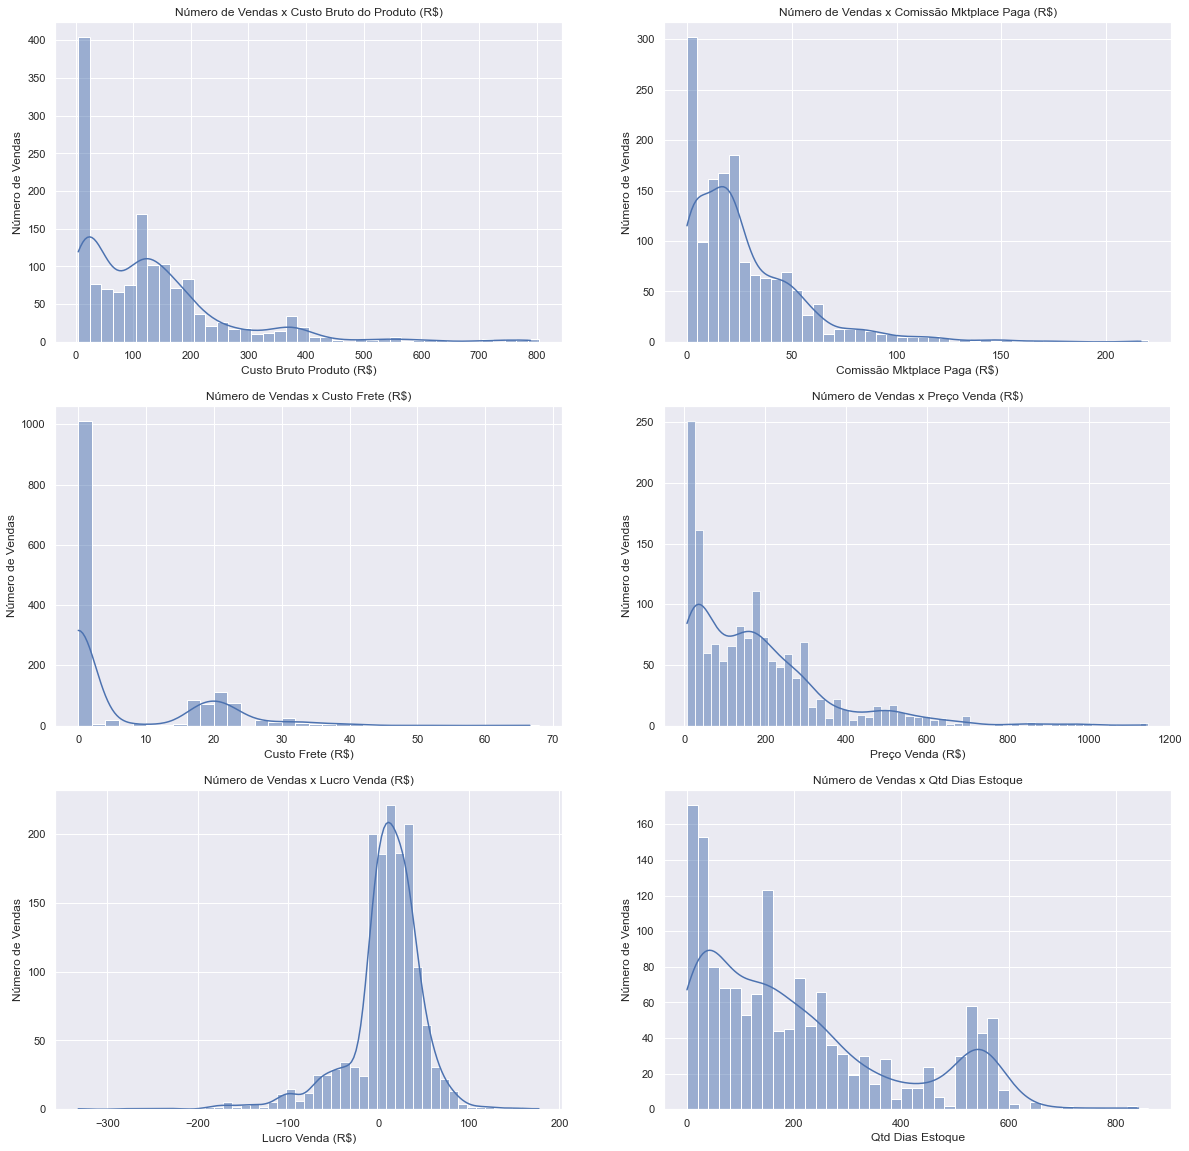

In [368]:
#Num Attributes plot
#histogram = represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
age_hist = sns.histplot(num_attributes['custo_bruto'], binwidth=20, kde=True);
age_hist.set_ylabel('Número de Vendas')
age_hist.set_xlabel('Custo Bruto Produto (R$)')
age_hist.set_title('Número de Vendas x Custo Bruto do Produto (R$)');

plt.subplot(3,2,2)
age_hist = sns.histplot(num_attributes['comissoes_mktplace'], binwidth=5, kde=True);
age_hist.set_ylabel('Número de Vendas')
age_hist.set_xlabel('Comissão Mktplace Paga (R$)')
age_hist.set_title('Número de Vendas x Comissão Mktplace Paga (R$)');

plt.subplot(3,2,3)
age_hist = sns.histplot(num_attributes['frete'], binwidth=2, kde=True);
age_hist.set_ylabel('Número de Vendas')
age_hist.set_xlabel('Custo Frete (R$)')
age_hist.set_title('Número de Vendas x Custo Frete (R$)');

plt.subplot(3,2,4)
age_hist = sns.histplot(num_attributes['preco_venda'], binwidth=20, kde=True);
age_hist.set_ylabel('Número de Vendas')
age_hist.set_xlabel('Preço Venda (R$)')
age_hist.set_title('Número de Vendas x Preço Venda (R$)');

plt.subplot(3,2,5)
age_hist = sns.histplot(num_attributes['lucro_venda'], binwidth=10, kde=True);
age_hist.set_ylabel('Número de Vendas')
age_hist.set_xlabel('Lucro Venda (R$)')
age_hist.set_title('Número de Vendas x Lucro Venda (R$)');

plt.subplot(3,2,6)
age_hist = sns.histplot(num_attributes['dias_estoque'], binwidth=20, kde=True);
age_hist.set_ylabel('Número de Vendas')
age_hist.set_xlabel('Qtd Dias Estoque')
age_hist.set_title('Número de Vendas x Qtd Dias Estoque');

### Categorical Attibures

In [363]:
#valores distintos por feature
print(f"Distinct values:\n{cat_attributes.apply( lambda x: x.unique().shape[0] ) } \n" )

Distinct values:
sku                   347
produto               356
fornecedor             13
marketplace_venda       8
cliente              1286
uf                     23
dtype: int64 



In [364]:
#valores das features
print(f"Variations:\n{cat_attributes.apply( lambda x: x.unique() ) } " )

Variations:
sku                  [6105380000, 3085250000, 3002142518, 303281321...
produto              [CX FERRAM METALICA/PLAST CMV 0380 VONDER, TES...
fornecedor           [OVD, BAIP, CARLU, MMT, YESTOYS, XALINGO, FUJI...
marketplace_venda    [ENTREGUE EM MÃOS, ML MHL TOOLS, ML ALEGRISHOP...
cliente              [f1f57e0e043eafbec890, 5807893901f09e4be73e, 1...
uf                   [PR, SP, RJ, MS, RS, SC, SE, MG, ES, PI, MT, D...
dtype: object 


#### Distribution evaluation

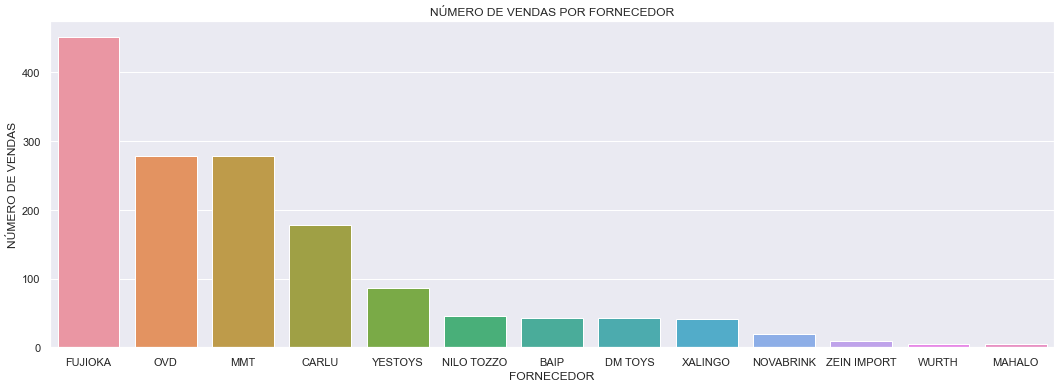

In [375]:
#vendas por fornecedor
plt.figure(figsize=(18,6))
vendas_forn = sns.countplot (
    x = cat_attributes['fornecedor'], 
    order=cat_attributes['fornecedor'].value_counts().index);
vendas_forn.set_title('NÚMERO DE VENDAS POR FORNECEDOR');
vendas_forn.set_ylabel('NÚMERO DE VENDAS');
vendas_forn.set_xlabel('FORNECEDOR');

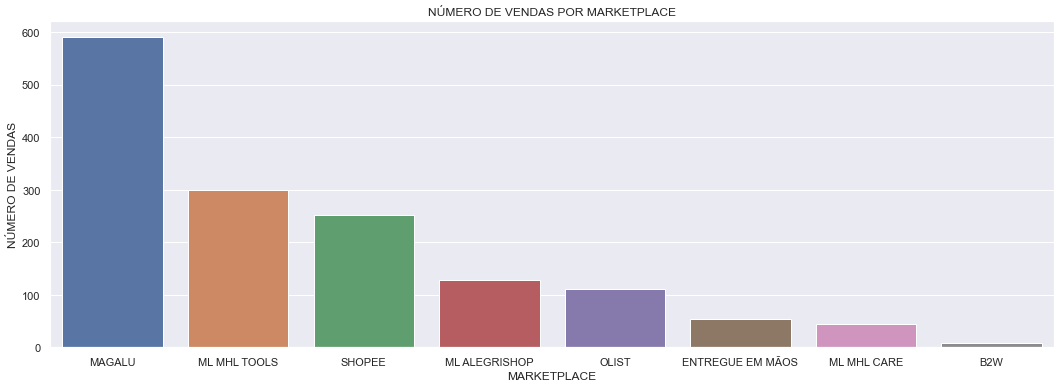

In [374]:
#vendas por marketplace  
plt.figure(figsize=(18,6))
vendas_mktplace = sns.countplot (
    x = cat_attributes['marketplace_venda'], 
    order=cat_attributes['marketplace_venda'].value_counts().index);
vendas_mktplace.set_title('NÚMERO DE VENDAS POR MARKETPLACE');
vendas_mktplace.set_ylabel('NÚMERO DE VENDAS');
vendas_mktplace.set_xlabel('MARKETPLACE');

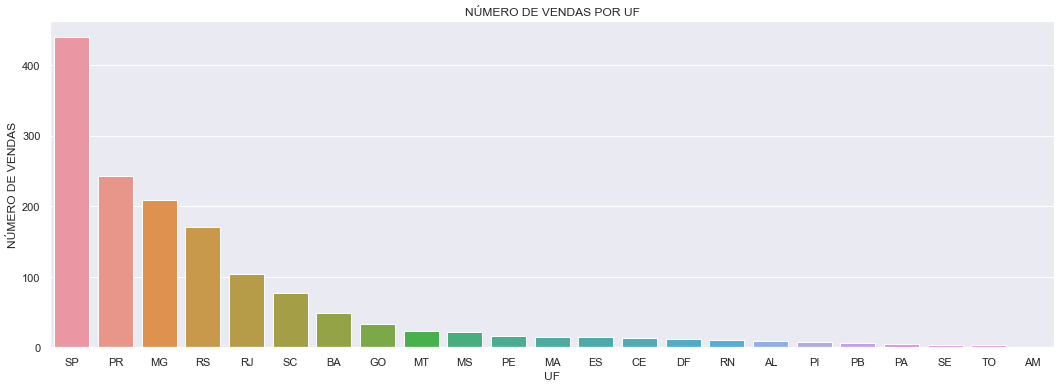

In [373]:
#vendas por UF  
plt.figure(figsize=(18,6))
vendas_fornecedor = sns.countplot (
    x = cat_attributes['uf'], 
    order=cat_attributes['uf'].value_counts().index);
vendas_fornecedor.set_title('NÚMERO DE VENDAS POR UF');
vendas_fornecedor.set_ylabel('NÚMERO DE VENDAS');
vendas_fornecedor.set_xlabel('UF');

OBS: 4 UFs do norte não tiveram vendas: Acre(AC), Roraima(RR), Amapá(AP), e Rondônia(RO).

# Feature Engeneering

In [378]:
#criação de df3
df3 = df2.copy()

In [379]:
df3.sample(3)

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,uf
23,2019-11-16,1037331920,FITA ISOL 19MMX20M SCOTCH 33+ 3M 3919.10.20,OVD,16.08,9.44,0.00,26.90,0.64,444,2021-02-02,ML MHL TOOLS,131fb4db8675c01bb276,SP
1214,2021-07-14,691140,ESCOVA ROTATIVA MONDIAL ER-09 127V,FUJIOKA,196.77,60.78,20.99,319.90,39.67,54,2021-09-06,ML MHL CARE,647a0c4c83e96f81867d,SP
262,2020-07-16,54986POLBRAGRA,CAMISA POLO MASCULINA ESTAMPADA FLOWERS MMT - ...,MMT,14.40,0.00,0.00,23.92,8.87,139,2020-12-02,SHOPEE,9d090e9874eb58270246,RJ


Features que precisam ser criadas para validar as hipóteses, e responder as questões de negócio:
- marketplace_unificado: juntando todos os marketplaces 'Mercado Livre' de marketplace_venda
- regiao_br: região do brasil, conforme a UF
- ano_mes_venda: sendo ano e mês da venda, com base na data_venda
- quarter_venda: trimestre da venda, com base na data_venda
- dia_semana: dia da semana, em portugues
- fim_semana: True ou False, conforme o dia da semana

---
Hipóteses para validar:
H1 - Em média, os produtos mais caros foram vendidos para a região sul.
H2 - Proporcionalmente, o estado do Rio Grande do Sul compra mais do fornecedor Carlu que os demais.
H3 - O Lucro dos produtos vendidos no estado do Paraná foi maior, em média, que nos demais estados.
H4 - Mais de 50% das vendas ocorreram nos finais de semana.

Questões para responder:
Q1 - Os produtos de diferentes preços venderam de forma homogênea nos diversos marketplaces?
Q2 - Qual marketplace vendeu os produtos de maior valor?
Q3 - Qual foi o número de vendas por fornecedor em cada marketplace?
Q4 - Qual fornecedor mais vendeu para cada região do Brasil?
Q5 - Qual marketplace mais vendeu para cada região do Brasil?
Q6 - Qual foi o lucro médio por fornecedor?
Q7 - Qual foi o número de vendas por trimeste? E por mês?
Q8 - Qual foi o faturamento por trimeste? E por mês?
Q9 - Qual foi o lucro por trimeste? E por mês?

## Feature creation

### marketplace_unificado

In [ ]:
# marketplace_unificado: juntando todos os marketplaces Mercado Livre de marketplace_venda

In [380]:
#unificar os MLs
df3['marketplace_unificado'] = df3['marketplace_venda'].copy() 

In [381]:
df3.loc[ df3['marketplace_venda'] == 'ML MHL TOOLS', 'marketplace_unificado'] = 'MERCADO LIVRE'
df3.loc[ df3['marketplace_venda'] == 'ML ALEGRISHOP', 'marketplace_unificado'] = 'MERCADO LIVRE'
df3.loc[ df3['marketplace_venda'] == 'ML MHL CARE', 'marketplace_unificado'] = 'MERCADO LIVRE'

In [382]:
#conferir resultados
df3['marketplace_unificado'].value_counts()

MAGALU              591
MERCADO LIVRE       471
SHOPEE              251
OLIST               110
ENTREGUE EM MÃOS     54
B2W                   8
Name: marketplace_unificado, dtype: int64

### regiao_br

In [ ]:
# regiao_br: região do brasil, conforme a UF

In [383]:
df3['regiao_br'] = df3['uf'].copy()

In [384]:
df3['uf'].value_counts()

SP    440
PR    243
MG    209
RS    171
RJ    104
SC     77
BA     49
GO     33
MT     23
MS     21
PE     16
MA     15
ES     14
CE     13
DF     12
RN     11
AL      9
PI      7
PB      6
PA      5
SE      3
TO      3
AM      1
Name: uf, dtype: int64

In [385]:
#criação das regiões
df3.loc[ df3['uf'] == 'RS' , 'regiao_br'] = 'SUL'
df3.loc[ df3['uf'] == 'SC' , 'regiao_br'] = 'SUL'
df3.loc[ df3['uf'] == 'PR' , 'regiao_br'] = 'SUL'

df3.loc[ df3['uf'] == 'SP' , 'regiao_br'] = 'SUDESTE'
df3.loc[ df3['uf'] == 'MG' , 'regiao_br'] = 'SUDESTE'
df3.loc[ df3['uf'] == 'RJ' , 'regiao_br'] = 'SUDESTE'
df3.loc[ df3['uf'] == 'ES' , 'regiao_br'] = 'SUDESTE'

df3.loc[ df3['uf'] == 'MT' , 'regiao_br'] = 'CENTRO-OESTE'
df3.loc[ df3['uf'] == 'MS' , 'regiao_br'] = 'CENTRO-OESTE'
df3.loc[ df3['uf'] == 'GO' , 'regiao_br'] = 'CENTRO-OESTE'
df3.loc[ df3['uf'] == 'DF' , 'regiao_br'] = 'CENTRO-OESTE'

df3.loc[ df3['uf'] == 'BA' , 'regiao_br'] = 'NORDESTE'
df3.loc[ df3['uf'] == 'PI' , 'regiao_br'] = 'NORDESTE'
df3.loc[ df3['uf'] == 'MA' , 'regiao_br'] = 'NORDESTE'
df3.loc[ df3['uf'] == 'CE' , 'regiao_br'] = 'NORDESTE'
df3.loc[ df3['uf'] == 'RN' , 'regiao_br'] = 'NORDESTE'
df3.loc[ df3['uf'] == 'PB' , 'regiao_br'] = 'NORDESTE'
df3.loc[ df3['uf'] == 'PE' , 'regiao_br'] = 'NORDESTE'
df3.loc[ df3['uf'] == 'AL' , 'regiao_br'] = 'NORDESTE'
df3.loc[ df3['uf'] == 'SE' , 'regiao_br'] = 'NORDESTE'

df3.loc[ df3['uf'] == 'PA' , 'regiao_br'] = 'NORTE'
df3.loc[ df3['uf'] == 'AM' , 'regiao_br'] = 'NORTE'
df3.loc[ df3['uf'] == 'TO' , 'regiao_br'] = 'NORTE'

In [387]:
#conferir
df3['regiao_br'].value_counts()

SUDESTE         767
SUL             491
NORDESTE        129
CENTRO-OESTE     89
NORTE             9
Name: regiao_br, dtype: int64

### ano_mes_venda

In [ ]:
# ano_mes_venda: com base na data_venda

In [82]:
#criar campo
df3['ano_mes_venda'] = df3['data_venda'].copy()

In [90]:
#segue como datetime
df3.dtypes

data_compra              datetime64[ns]
sku                              object
produto                          object
fornecedor                       object
custo_bruto                     float64
comissoes_mktplace              float64
frete                           float64
preco_venda                     float64
lucro_venda                     float64
dias_estoque                      int64
cliente                          object
marketplace_venda                object
marketplace_unificado            object
data_venda               datetime64[ns]
dia_semana                       object
fim_semana                         bool
quarter_venda                    object
uf                               object
regiao_br                        object
ano_mes_venda                    object
dtype: object

In [84]:
df3['ano_mes_venda'] = df3['data_venda'].dt.strftime('%Y-%m')

In [91]:
#conferir
df3['ano_mes_venda'] 

0       2020-10
1       2020-04
2       2020-11
3       2020-11
4       2020-08
         ...   
1480    2021-12
1481    2021-12
1482    2021-12
1483    2022-02
1484    2022-02
Name: ano_mes_venda, Length: 1485, dtype: object

### quarter_venda

In [ ]:
# quarter_venda: trimestre da venda, com base na data_venda

In [392]:
#criar coluna quarter_venda
df3['quarter_venda'] = df3['data_venda'].copy()

In [393]:
df3['quarter_venda'] = df3['data_venda'].dt.to_period('Q').dt.strftime('%Y-T%q') #2020-T4

In [397]:
df3['quarter_venda']

0       2020-T4
1       2020-T2
2       2020-T4
3       2020-T4
4       2020-T3
         ...   
1480    2021-T4
1481    2021-T4
1482    2021-T4
1483    2022-T1
1484    2022-T1
Name: quarter_venda, Length: 1485, dtype: object

### dia_semana

In [ ]:
# dia_semana: dia da semana

In [398]:
#criar coluna dia_semana
df3['dia_semana'] = df3['data_venda'].copy()

In [399]:
df3['dia_semana'] = df3['data_venda'].dt.strftime('%A')

In [400]:
df3['dia_semana']

0          Monday
1         Tuesday
2          Monday
3          Monday
4        Saturday
          ...    
1480      Tuesday
1481     Thursday
1482      Tuesday
1483    Wednesday
1484       Friday
Name: dia_semana, Length: 1485, dtype: object

### fim_semana

In [ ]:
# fim_semana: True ou False, conforme o dia da semana

In [402]:
#criar coluna fim_semana
df3['fim_semana'] = df3['dia_semana'].copy()

In [403]:
#atribuir True se dia de semana, senão False
df3['fim_semana'] = df3['dia_semana'].apply( lambda x : True if x == 'Saturday' or x == 'Sunday' else False)

In [410]:
#conferir
df3.sample(5)

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,data_venda,marketplace_venda,cliente,uf,marketplace_unificado,regiao_br,mes_ano_venda,quarter_venda,dia_semana,fim_semana
152,2019-09-13,1166,JOGO XADREZ OFICIAL - 1166,CARLU,63.22,19.78,16.95,119.90,17.45,436,2020-11-22,ML ALEGRISHOP,bea0defdb49e05214014,RJ,MERCADO LIVRE,SUDESTE,11-2020,2020-T4,Sunday,True
290,2020-07-16,54992POLAZUGRA,CAMISA POLO MASCULINA AUTHENTIC COM DETALHES E...,MMT,14.40,0.00,0.00,23.92,8.87,152,2020-12-15,SHOPEE,d54510f7e0fcebcc85db,RS,SHOPEE,SUL,12-2020,2020-T4,Tuesday,False
1462,2021-11-09,19968,APARADOR MONDIAL BG-05 11 EM 1 BIV,FUJIOKA,113.37,21.75,0.00,169.90,17.79,8,2021-11-17,MAGALU,7f531f5bbfdfb005d19a,PR,MAGALU,SUL,11-2021,2021-T4,Wednesday,False
727,2021-02-11,19580,ESCOVA ROT.MONDIAL ER-05 110V,FUJIOKA,185.25,37.49,0.00,249.90,28.99,71,2021-04-23,OLIST,a098396c3a5df9601e1c,PR,OLIST,SUL,04-2021,2021-T2,Friday,False
334,2020-07-16,56262BERAZUGG,BERMUDA MOLETOM MOLETINHO BRUXELAS PLAQ COURO ...,MMT,18.33,12.58,0.00,39.90,7.34,156,2020-12-19,ENTREGUE EM MÃOS,76eb66ad1bcb78bbbb29,SP,ENTREGUE EM MÃOS,SUDESTE,12-2020,2020-T4,Saturday,True


## Reorder Columns

In [93]:
#reordenar colunas:
df3.columns

Index(['data_compra', 'sku', 'produto', 'fornecedor', 'custo_bruto',
       'comissoes_mktplace', 'frete', 'preco_venda', 'lucro_venda',
       'dias_estoque', 'cliente', 'marketplace_venda', 'marketplace_unificado',
       'data_venda', 'dia_semana', 'fim_semana', 'quarter_venda', 'uf',
       'regiao_br', 'ano_mes_venda'],
      dtype='object')

In [412]:
#backup
df3_bk = df3.copy()

In [95]:
#como está hoje
df3[['data_compra', 'sku', 'produto', 'fornecedor', 'custo_bruto',
       'comissoes_mktplace', 'frete', 'preco_venda', 'lucro_venda',
       'dias_estoque', 'cliente', 'marketplace_venda', 'marketplace_unificado',
       'data_venda', 'dia_semana', 'fim_semana', 'quarter_venda', 'uf',
       'regiao_br', 'ano_mes_venda']].sample(1)

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,cliente,marketplace_venda,marketplace_unificado,data_venda,dia_semana,fim_semana,quarter_venda,uf,regiao_br,ano_mes_venda
618,2020-09-08,6001020220,SOPRADOR TERMICO STV2000N 220V VONDER,OVD,164.52,42.48,16.95,249.9,25.71,153,343d5c8477b09fd17770,ML ALEGRISHOP,MERCADO LIVRE,2021-02-08,Monday,False,2021-T1,GO,CENTRO-OESTE,2021-02


In [96]:
#reordenando as colunas agrupando por contexto:
df3 = df3[['data_compra', 'sku', 'produto', 'fornecedor', 'custo_bruto',
       'comissoes_mktplace', 'frete', 'preco_venda', 'lucro_venda',
       'dias_estoque','cliente','marketplace_venda','marketplace_unificado',
        'data_venda','dia_semana','fim_semana','ano_mes_venda',
        'quarter_venda','uf','regiao_br' ]]

In [97]:
df3.sample(1)

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,cliente,marketplace_venda,marketplace_unificado,data_venda,dia_semana,fim_semana,ano_mes_venda,quarter_venda,uf,regiao_br
1432,2021-09-18,19696,APARADOR MONDIAL BG-03 10 EM 1 BIV 2,FUJIOKA,108.1,22.24,22.14,130.82,-34.74,142,65f9a4bdd28e2a89bedb,ML MHL TOOLS,MERCADO LIVRE,2022-02-07,Monday,False,2022-02,2022-T1,SP,SUDESTE


In [98]:
#conferir tipos
df3.dtypes

data_compra              datetime64[ns]
sku                              object
produto                          object
fornecedor                       object
custo_bruto                     float64
comissoes_mktplace              float64
frete                           float64
preco_venda                     float64
lucro_venda                     float64
dias_estoque                      int64
cliente                          object
marketplace_venda                object
marketplace_unificado            object
data_venda               datetime64[ns]
dia_semana                       object
fim_semana                         bool
ano_mes_venda                    object
quarter_venda                    object
uf                               object
regiao_br                        object
dtype: object

In [99]:
df3.shape

(1485, 20)

# EDA

In [100]:
df3.to_csv('../data/processed/df3_feature_eng_done.csv')

In [101]:
df4 = pd.read_csv('../data/processed/df3_feature_eng_done.csv', index_col=0, parse_dates=['data_compra','data_venda'])

In [102]:
df4.dtypes

data_compra              datetime64[ns]
sku                              object
produto                          object
fornecedor                       object
custo_bruto                     float64
comissoes_mktplace              float64
frete                           float64
preco_venda                     float64
lucro_venda                     float64
dias_estoque                      int64
cliente                          object
marketplace_venda                object
marketplace_unificado            object
data_venda               datetime64[ns]
dia_semana                       object
fim_semana                         bool
ano_mes_venda                    object
quarter_venda                    object
uf                               object
regiao_br                        object
dtype: object

In [183]:
df4.sample(1)

,data_compra,sku,produto,fornecedor,custo_bruto,comissoes_mktplace,frete,preco_venda,lucro_venda,dias_estoque,cliente,marketplace_venda,marketplace_unificado,data_venda,dia_semana,fim_semana,ano_mes_venda,quarter_venda,uf,regiao_br
1380,2021-09-10,19335,ESCOVA ROT.MONDIAL ER-03 TOURMALINE 110V,FUJIOKA,144.75,19.45,0.0,151.92,-27.47,150,a2cbf43e3dff33cc1acf,MAGALU,MAGALU,2022-02-07,Monday,False,2022-02,2022-T1,PR,SUL


## Univariate Analysis - with SweetViz

In [184]:
# Generate report
report = sv.analyze(df3)

                                             |                                                   | [  0%]   00…

In [187]:
# Save on project and show on browser
report.show_html('../reports/eda/sweetviz_report.html',open_browser=True)

Report ../reports/eda/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Hypotheses Validation

Hipóteses para validar:

- H1 - Em média, os produtos mais caros foram vendidos para a região sul.
- H2 - Proporcionalmente, o estado do Rio Grande do Sul compra mais do fornecedor Carlu que os demais.
- H3 - O Lucro dos produtos vendidos no estado do Paraná foi maior, em média, que nos demais estados.
- H4 - Mais de 50% das vendas ocorreram nos finais de semana.

### [H1] Em média, os produtos mais caros foram vendidos para a região sul.
***HIPÓTESES FALSA*** - Em média, os produtos mais caros foram vendidos para a região Norte.

- Obter o preço médio de vendas de cada região.
- Plotar num gráfico.

In [193]:
df_h1 = df4[['preco_venda','regiao_br']].groupby('regiao_br').mean().reset_index().sort_values('preco_venda', ascending=False)

df_h1

,regiao_br,preco_venda
2,NORTE,274.344444
1,NORDESTE,257.264729
0,CENTRO-OESTE,234.987640
4,SUL,173.818473
3,SUDESTE,161.304589


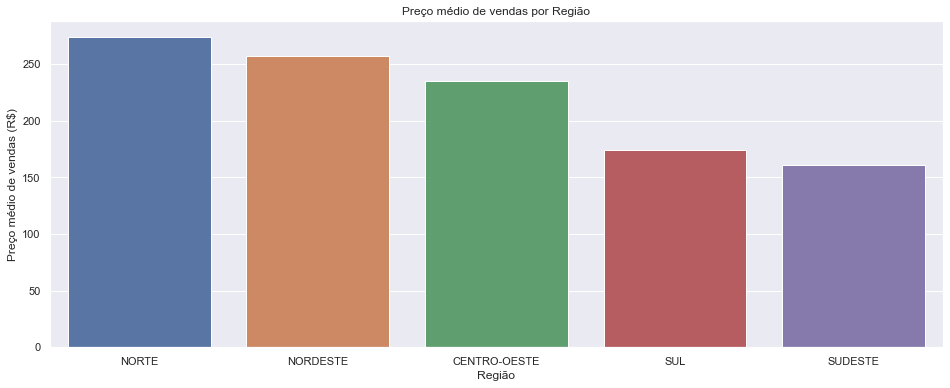

In [447]:
plt.figure(figsize=(16,6))
h1_bar = sns.barplot (x='regiao_br', y='preco_venda', data=df_h1); 
h1_bar.set_title('Preço médio de vendas por Região');
h1_bar.set_ylabel('Preço médio de vendas (R$)');
h1_bar.set_xlabel('Região');

In [198]:
df3['regiao_br'].value_counts()

SUDESTE         767
SUL             491
NORDESTE        129
CENTRO-OESTE     89
NORTE             9
Name: regiao_br, dtype: int64

HIPÓTESE FALSA: Em média, foram vendidos mais produtos caros para a região Norte.
Das 5 regiões, a sul fica em quarto em termos de produtos mais caros vendidos, na média.

INSIGHT: Realizar promoções/marketing direcionado às regiões norte, nordeste e centro oeste pode ajudar a aumentar o ticket médio nestas regiões, aumentando a representatividade delas na proporção das vendas.

### [H2] Proporcionalmente, o estado do Rio Grande do Sul compra mais do fornecedor Carlu que os demais.
***HIPÓTESES FALSA*** - Proporcionalmente, o estado do DF compra mais do fornecedor Carlu que os demais, e não o estado do RS.

- Criar novo dataset df_h2, onde na coluna fornecedor, vou separar entre "Carlu" ou "Outros".
- Fazer um crosstab com % por estado, pra descobrir quanto % vendeu de Carlu e de Outros. 
- Plotar um barplot stacked.

In [448]:
df_h2 = df4.copy()

In [450]:
#listar todos os fornecedores
df_h2['fornecedor'].value_counts()

FUJIOKA        452
OVD            279
MMT            279
CARLU          178
YESTOYS         86
NILO TOZZO      45
BAIP            43
DM TOYS         43
XALINGO         41
NOVABRINK       20
ZEIN IMPORT      9
WURTH            5
MAHALO           5
Name: fornecedor, dtype: int64

In [452]:
#Atribuir Outros em df_h2 quando for diferente de Carlu.
df_h2.loc[df_h2['fornecedor'] != 'CARLU' , 'fornecedor'] = 'OUTROS'

In [453]:
#listar todos os fornecedores
df_h2['fornecedor'].value_counts()

OUTROS    1307
CARLU      178
Name: fornecedor, dtype: int64

In [454]:
#crosstab obtendo o % de Carlu e de Outros por uf
crosstab_h2 = pd.crosstab( df_h2['uf'], df_h2['fornecedor'] ).apply( lambda x: x/x.sum()*100, axis=1, )
#arredondar 1 casa decimal:
crosstab_h2.round(decimals=1)

fornecedor,CARLU,OUTROS
uf,,
AL,0.0,100.0
AM,0.0,100.0
BA,14.3,85.7
CE,15.4,84.6
DF,25.0,75.0
ES,0.0,100.0
GO,3.0,97.0
MA,0.0,100.0
MG,14.4,85.6


In [472]:
#ordenar por Carlu desc
crosstab_h2 = crosstab_h2.sort_values('CARLU', ascending=False)

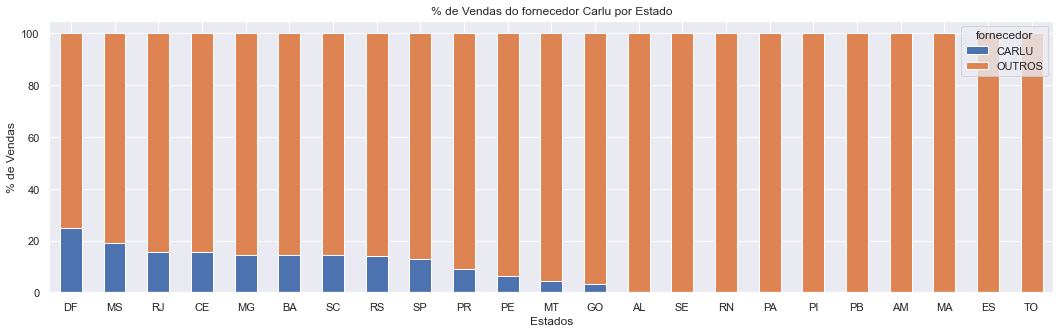

In [473]:
#Plotar Crosstab % em stacked bars
plt.rcParams["figure.figsize"] = (18, 5)
h2_bar = crosstab_h2.plot(kind="bar", stacked=True, rot=0);
h2_bar.set_title('% de Vendas do fornecedor Carlu por Estado');
h2_bar.set_ylabel('% de Vendas');
h2_bar.set_xlabel('Estados');

HIPÓTESE FALSA: Proporcionalmente, o estado do DF compra mais do fornecedor Carlu que os demais, e não o estado do RS.

INSIGHT: Nenhum.

### [H3] O Lucro dos produtos vendidos no estado do Paraná foi maior, em média, que nos demais estados.
***HIPÓTESES FALSA*** - O Lucro dos produtos vendidos no PR foi MENOR entre todos os estados.

- Obter a média de lucro_venda por estado: Agrupar LL por UF, pela média.

In [219]:
df_h3 = df4[['uf', 'lucro_venda']].groupby('uf').mean().reset_index().sort_values('lucro_venda', ascending=False)
df_h3

,uf,lucro_venda
11,PA,35.770000
22,TO,34.830000
13,PE,32.826875
1,AM,29.180000
7,MA,29.083333
14,PI,27.524286
4,DF,27.000000
20,SE,24.013333
17,RN,22.664545
12,PB,22.226667


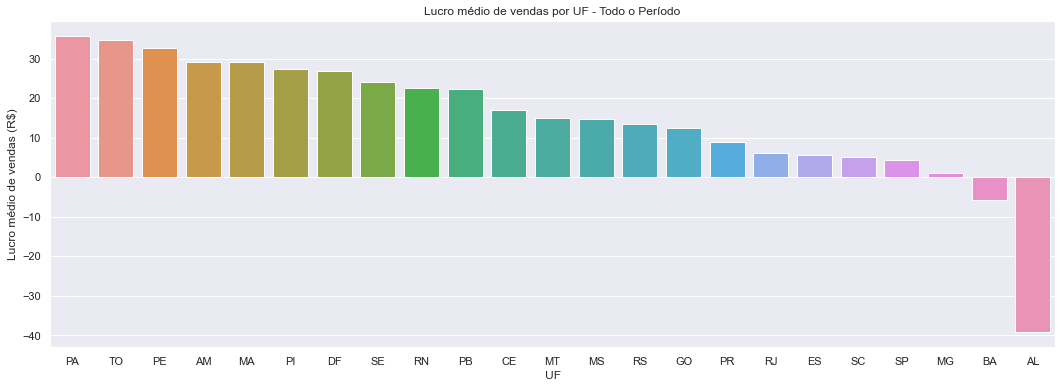

In [224]:
plt.rcParams["figure.figsize"] = (18, 6)
h3_bar = sns.barplot (x='uf', y='lucro_venda', data=df_h3); 
h3_bar.set_title('Lucro médio de vendas por UF - Todo o Período');
h3_bar.set_ylabel('Lucro médio de vendas (R$)');
h3_bar.set_xlabel('UF');

In [226]:
#Criando dataset antes da liquidação dos produtos
df4_bef_sale = df4.loc[ df4['data_venda'] <= '2021-12-15' ]
df4_bef_sale.shape[0]

1043

In [227]:
df_h3_bs = df4_bef_sale[['uf', 'lucro_venda']].groupby('uf').mean().reset_index().sort_values('lucro_venda', ascending=False)
df_h3_bs

,uf,lucro_venda
13,PE,47.472308
17,RN,37.184444
7,MA,35.989167
11,PA,35.770000
22,TO,34.830000
14,PI,33.556000
0,AL,33.546667
10,MT,31.760000
3,CE,31.582000
6,GO,31.123333


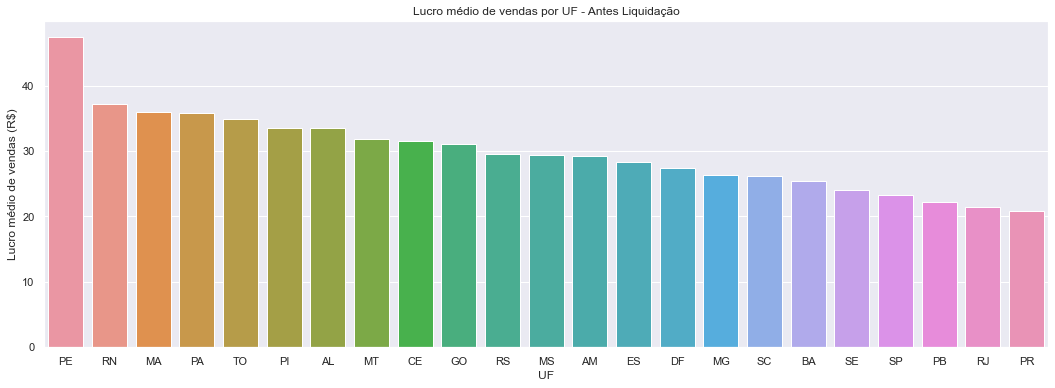

In [228]:
plt.rcParams["figure.figsize"] = (18, 6)
h3_bar_bs = sns.barplot (x='uf', y='lucro_venda', data=df_h3_bs); 
h3_bar_bs.set_title('Lucro médio de vendas por UF - Antes Liquidação');
h3_bar_bs.set_ylabel('Lucro médio de vendas (R$)');
h3_bar_bs.set_xlabel('UF');

HIPÓTESE FALSA: O Lucro dos produtos vendidos no PR foi MENOR entre todos os estados.

INSIGHT: Rever a política da empresa de desconto aos sócios na aquisição de produtos, visto que são do PR, e possivelmente parte deste resultado é devido a ela.

### [H4] Mais de 50% das vendas ocorreram nos finais de semana.  
***HIPÓTESE FALSA*** - Mais de 95% das vendas ocorreram nos dias de semana.

- Obter o % de vendas nos fins de semana e nos dias de semana com crosstab

In [480]:
#criar coluna com dados iguais, para agrupar por ela com crosstab
df_h4 = df4.copy()
#setar TODOS em fornecedor, para não quebrar por fornecedor
df_h4['fornecedor'] = 'TODOS'

In [481]:
#obter o % total de vendas nos finais de semana, e nos dias de semana
pd.crosstab( df_h4['fornecedor'], df_h4['fim_semana'],normalize='index').apply( lambda x: x / x.sum()*100, axis=1 ).round(decimals=2)

fim_semana,False,True
fornecedor,,
TODOS,95.08,4.92


In [230]:
#avaliar distribuição por dia da semana
df4['dia_semana'].value_counts()

Monday       431
Tuesday      295
Wednesday    263
Thursday     232
Friday       191
Saturday      38
Sunday        35
Name: dia_semana, dtype: int64

HIPÓTESE FALSA: Mais de 95% das vendas ocorreram nos dias de semana.

INSIGHT: Obter dados de pedidos de vendas concretizados do ERP, e cruzar as datas de venda com estes dados, visando avaliar se houveram erros operacionais de lançamentos nas vendas da planilha, visto que o resultado contraria bastante a percepção da realidade da operação.

Muito provavelmente, por não haver entregas nos sábados e domingos, parte das vendas nestes dias foram lançadas na planilha como sendo realizadas na segunda-feira.

## Business Questions

Questões para responder:
- Q1 - Os produtos de diferentes preços venderam de forma homogênea nos diversos marketplaces?
- Q2 - Qual marketplace vendeu os produtos de maior valor?
- Q3 - Qual foi o número de vendas por fornecedor em cada marketplace?
- Q4 - Qual fornecedor mais vendeu para cada região do Brasil?
- Q5 - Qual marketplace mais vendeu para cada região do Brasil?
- Q6 - Qual foi o lucro médio por fornecedor?
- Q7 - Qual foi o número de vendas por trimeste? E por mês?
- Q8 - Qual foi o faturamento por trimeste? E por mês?
- Q9 - Qual foi o lucro por trimeste? E por mês?

### [1] - Os produtos de diferentes preços venderam de forma homogênea nos diversos marketplaces?

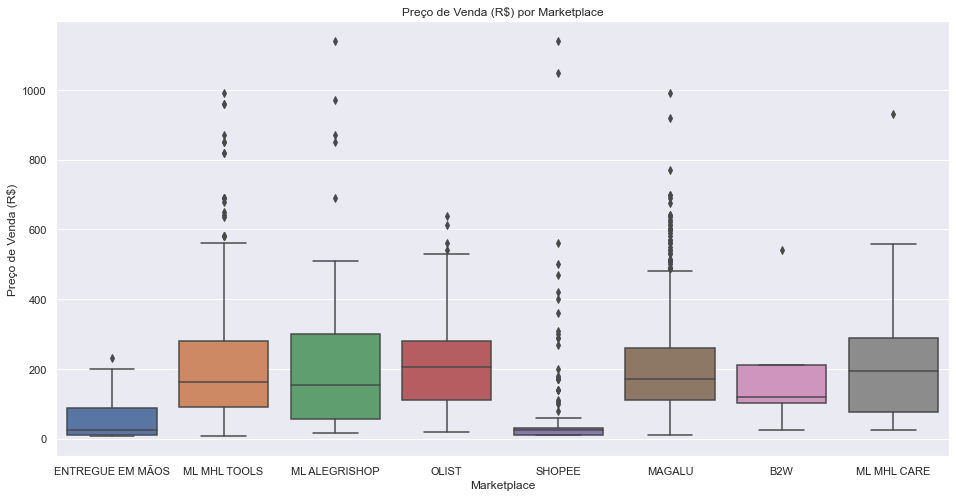

In [8]:
#Plotar boxplot para avaliar a distribuição das vendas
plt.figure(figsize=(16,8))
q1_box = sns.boxplot( x='marketplace_venda', y='preco_venda', data=df4);
q1_box.set_title('Preço de Venda (R$) por Marketplace');
q1_box.set_ylabel('Preço de Venda (R$)');
q1_box.set_xlabel('Marketplace');

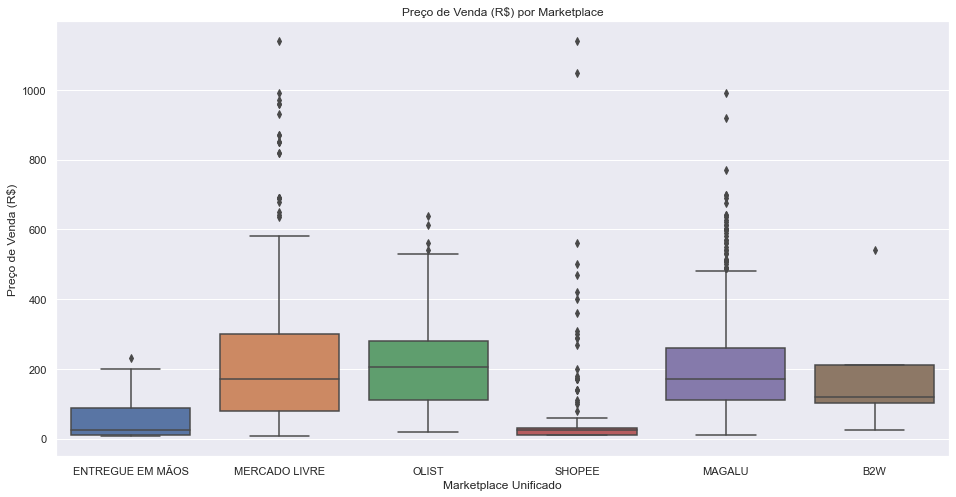

In [9]:
#Analisando pelo marketplace unificado
plt.figure(figsize=(16,8))
q1_box_uni = sns.boxplot( x='marketplace_unificado', y='preco_venda', data=df4 );
q1_box_uni.set_title('Preço de Venda (R$) por Marketplace');
q1_box_uni.set_ylabel('Preço de Venda (R$)');
q1_box_uni.set_xlabel('Marketplace Unificado');

In [13]:
#fazendo um corte nos produtos de até R$600, retirnado os outliers dos gráficos acima:
df4_q1_600 = df4.loc[df4['preco_venda'] <= 600 ]

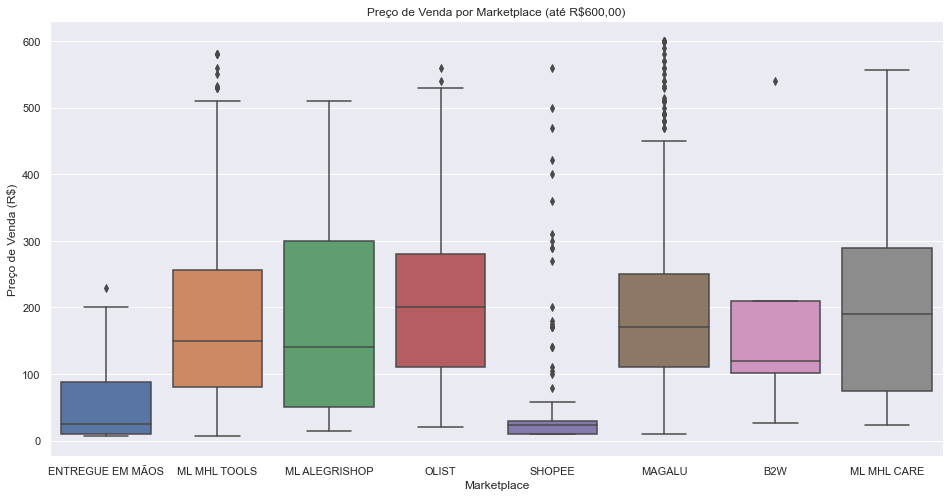

In [14]:
#por marketplace, até R$600:
plt.figure(figsize=(16,8))
q1_box_600 = sns.boxplot( x='marketplace_venda', y='preco_venda', data=df4_q1_600 );
q1_box_600.set_title('Preço de Venda por Marketplace (até R$600,00)');
q1_box_600.set_ylabel('Preço de Venda (R$)');
q1_box_600.set_xlabel('Marketplace');

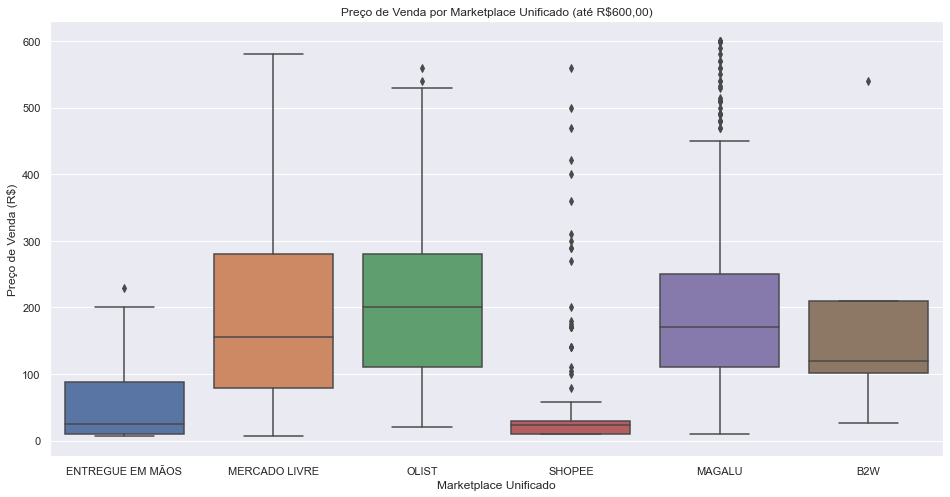

In [15]:
#por marketplace Uunificado, até R$600:
plt.figure(figsize=(16,8))
q1_box_uni_600 = sns.boxplot( x='marketplace_unificado', y='preco_venda', data=df4_q1_600 );
q1_box_uni_600.set_title('Preço de Venda por Marketplace Unificado (até R$600,00)');
q1_box_uni_600.set_ylabel('Preço de Venda (R$)');
q1_box_uni_600.set_xlabel('Marketplace Unificado');

QUESTÃO 1: Os produtos de diferentes preços venderam de forma homogênea nos diversos marketplaces?

R: Não, a mediana, representada pela linha central de cada boxplot, demonstra que houve uma maior incidência de vendas de produtos de preços diferentes em cada marketplace. 
Percebe-se porém uma maior similaridade entre os preços de venda de Magalu e MercadoLivre.

###  [2] - Qual marketplace vendeu os produtos de maior valor?

R: Utilizando os gráficos de Q1 sem o corte até 600 reais, observa-se que o marketplace Olist foi o que vendeu produtos de maior valor na maioria dos casos, considerando a mediana, que mostra a concentração dos dados.
Ele foi o único marketplace onde a mediana ultrapassou os 200 reais.

### [3] - Qual foi o número de vendas por fornecedor em cada marketplace?

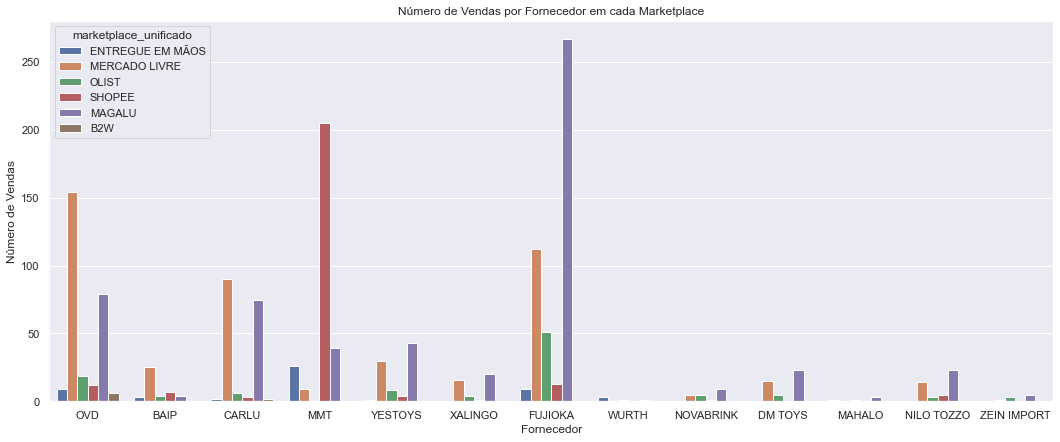

In [22]:
plt.figure(figsize=(18,7))
q3_plot = sns.countplot (x = df4['fornecedor'], hue=df4['marketplace_unificado']);
q3_plot.set_title('Número de Vendas por Fornecedor em cada Marketplace');
q3_plot.set_ylabel('Número de Vendas');
q3_plot.set_xlabel('Fornecedor');

R: Conforme gráfico acima.

### [4] - Qual fornecedor mais vendeu para cada região do Brasil?

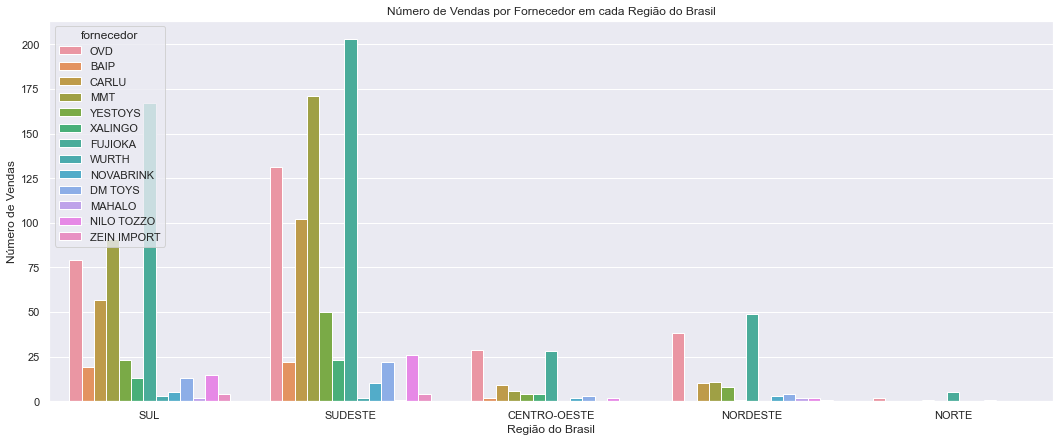

In [21]:
plt.figure(figsize=(18,7))
q4_plot = sns.countplot (x = df4['regiao_br'], hue=df4['fornecedor']);
q4_plot.set_title('Número de Vendas por Fornecedor em cada Região do Brasil');
q4_plot.set_ylabel('Número de Vendas');
q4_plot.set_xlabel('Região do Brasil');

R: O fornecedor Fujioka foi o que mais vendeu no sul, sudeste, nordeste e norte.

O fornecedor OVD foi o que mais vendeu na região centro-oeste.

### [5] - Qual marketplace mais vendeu para cada região do Brasil?

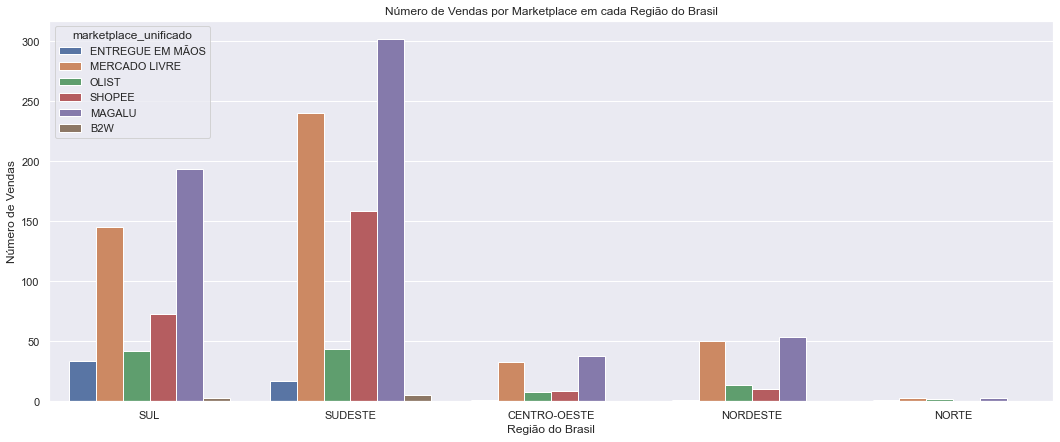

In [25]:
plt.figure(figsize=(18,7))
q5_plot = sns.countplot (x = df4['regiao_br'], hue=df4['marketplace_unificado']);
q5_plot.set_title('Número de Vendas por Marketplace em cada Região do Brasil');
q5_plot.set_ylabel('Número de Vendas');
q5_plot.set_xlabel('Região do Brasil');

R: A Magalu foi o marketplace que mais vendeu, nas regiões sul, sudeste e norte.

O Mercado Livre foi o que mais vendeu no centro-oeste e nordeste.

### [6] - Qual foi o lucro médio por fornecedor?

In [29]:
#lucro médio por fornecedor, ordenado descendente
df_q6 = df4[['fornecedor','lucro_venda']].groupby('fornecedor').mean().reset_index().sort_values('lucro_venda', ascending=False)
df_q6

,fornecedor,lucro_venda
4,MAHALO,42.698000
11,YESTOYS,27.428488
1,CARLU,19.949157
10,XALINGO,14.725366
3,FUJIOKA,8.977456
9,WURTH,6.694000
8,OVD,6.629713
7,NOVABRINK,3.568500
0,BAIP,1.481163
5,MMT,0.011613


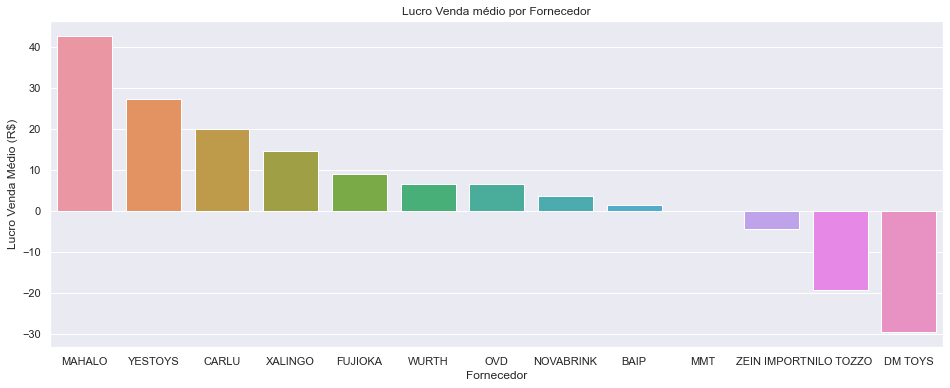

In [34]:
plt.figure(figsize=(16,6))
q6_bar = sns.barplot (x = df_q6['fornecedor'], y=df_q6['lucro_venda'] );
q6_bar.set_title('Lucro Venda médio por Fornecedor');
q6_bar.set_ylabel('Lucro Venda Médio (R$)');
q6_bar.set_xlabel('Fornecedor');

R: Conforme gráfico acima.

### [7] - Qual foi o número de vendas por trimeste? E por mês?

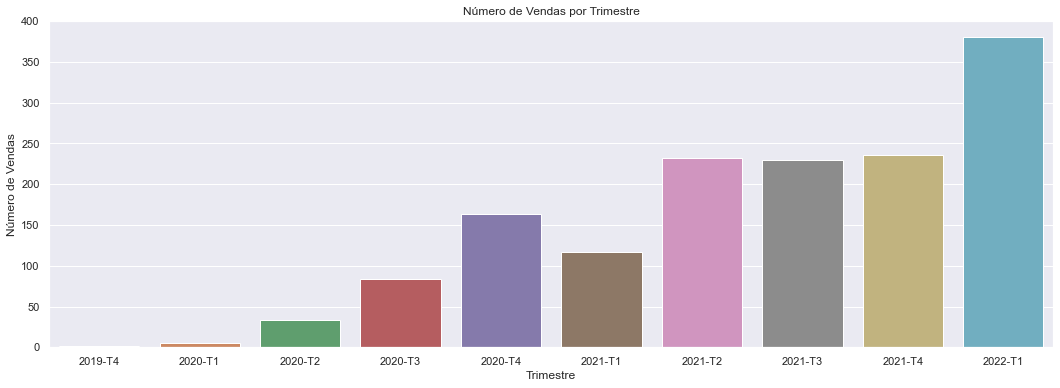

In [37]:
#Número de Vendas por Trimestre
plt.figure(figsize=(18,6))
order_quarter = ['2019-T4','2020-T1','2020-T2','2020-T3','2020-T4','2021-T1','2021-T2','2021-T3','2021-T4','2022-T1']
q7_plot = sns.countplot (x = df4['quarter_venda'], order=order_quarter);
q7_plot.set_title('Número de Vendas por Trimestre');
q7_plot.set_ylabel('Número de Vendas');
q7_plot.set_xlabel('Trimestre');

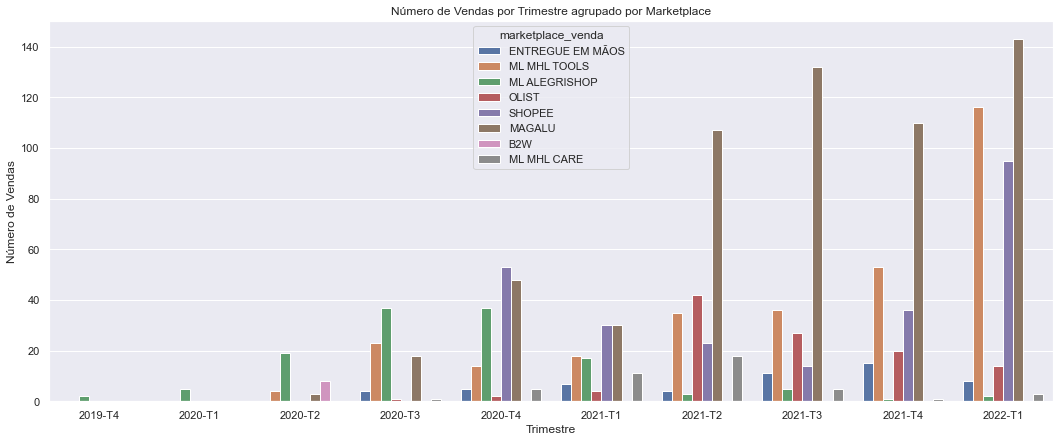

In [40]:
#Número de Vendas por Trimestre agrupado por marketplace
plt.figure(figsize=(18,7))
order_quarter = ['2019-T4','2020-T1','2020-T2','2020-T3','2020-T4','2021-T1','2021-T2','2021-T3','2021-T4','2022-T1']
q7_plot_mktplace = sns.countplot (x = df4['quarter_venda'], hue=df4['marketplace_venda'], order=order_quarter);
q7_plot_mktplace.set_title('Número de Vendas por Trimestre agrupado por Marketplace');
q7_plot_mktplace.set_ylabel('Número de Vendas');
q7_plot_mktplace.set_xlabel('Trimestre');

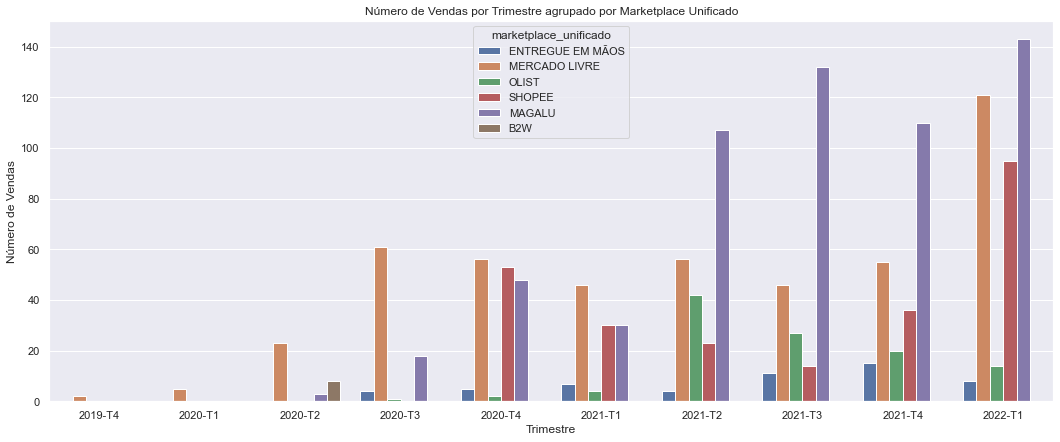

In [42]:
#Número de Vendas por Trimestre agrupado por marketplace unificado
plt.figure(figsize=(18,7))
order_quarter = ['2019-T4','2020-T1','2020-T2','2020-T3','2020-T4','2021-T1','2021-T2','2021-T3','2021-T4','2022-T1']
q7_plot_mktplace_u = sns.countplot (x = df4['quarter_venda'], hue=df4['marketplace_unificado'], order=order_quarter);
q7_plot_mktplace_u.set_title('Número de Vendas por Trimestre agrupado por Marketplace Unificado');
q7_plot_mktplace_u.set_ylabel('Número de Vendas');
q7_plot_mktplace_u.set_xlabel('Trimestre');

In [120]:
#Número de Vendas por Mês
df_mes_ano_venda = df4['ano_mes_venda'].value_counts().sort_index()
df_mes_ano_venda

2019-12      2
2020-01      1
2020-02      2
2020-03      2
2020-04      5
2020-05     10
2020-06     19
2020-07     33
2020-08     36
2020-09     15
2020-10     36
2020-11     42
2020-12     86
2021-01     32
2021-02     39
2021-03     46
2021-04     48
2021-05     91
2021-06     93
2021-07     86
2021-08     74
2021-09     70
2021-10     58
2021-11     62
2021-12    116
2022-01    140
2022-02    211
2022-03     30
Name: ano_mes_venda, dtype: int64

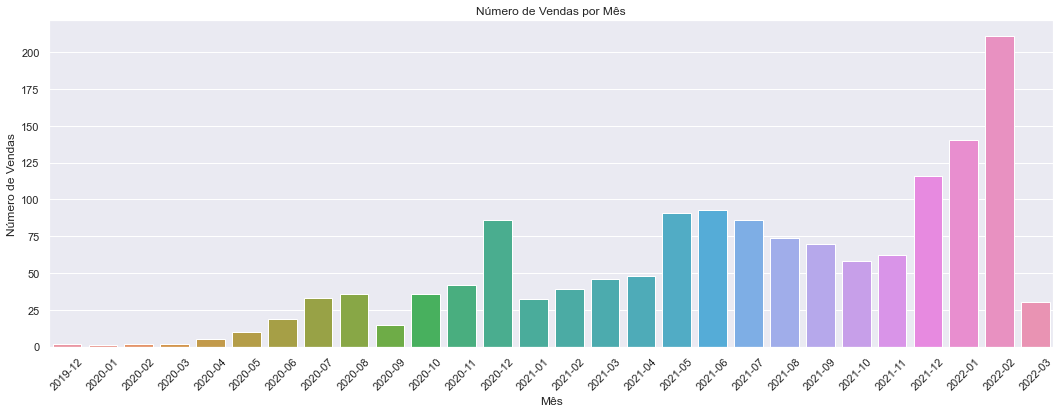

In [124]:
plt.figure(figsize=(18,6))
order_ano_mes = ['2019-12',
                 '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06',
                 '2020-07','2020-08','2020-09','2020-10','2020-11','2020-12',
                 '2021-01','2021-02','2021-03','2021-04','2021-05','2021-06',
                 '2021-07','2021-08','2021-09','2021-10','2021-11','2021-12',
                 '2022-01','2022-02','2022-03']
q7_plot_mes = sns.countplot (x = df4['ano_mes_venda'], order=order_ano_mes);
q7_plot_mes.set_title('Número de Vendas por Mês');
q7_plot_mes.set_ylabel('Número de Vendas');
q7_plot_mes.set_xlabel('Mês');
q7_plot_mes.tick_params(axis='x', rotation=45)

R: Conforme gráfico acima.

### [8] - Qual foi o faturamento por trimeste? E por mês?

In [128]:
#Faturamento por Trimestre
df_q8 = df4[['quarter_venda', 'preco_venda']].groupby('quarter_venda').sum().reset_index()
df_q8

,quarter_venda,preco_venda
0,2019-T4,169.80
1,2020-T1,1314.50
2,2020-T2,6684.60
3,2020-T3,21549.62
4,2020-T4,26114.68
5,2021-T1,15413.16
6,2021-T2,48632.90
7,2021-T3,51982.16
8,2021-T4,41326.34
9,2022-T1,52447.88


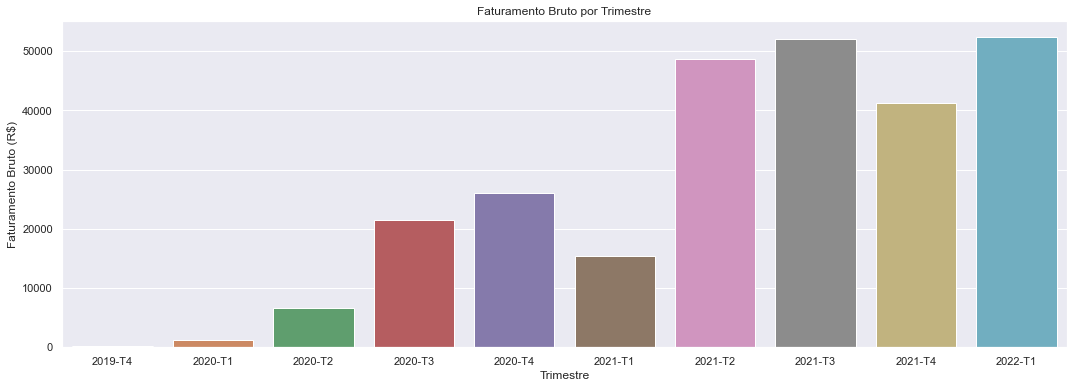

In [145]:
#Faturamento por Trimestre
plt.figure(figsize=(18,6))
q8_plot = sns.barplot (x = df_q8['quarter_venda'], y=df_q8['preco_venda'] );
q8_plot.set_title('Faturamento Bruto por Trimestre');
q8_plot.set_ylabel('Faturamento Bruto (R$)');
q8_plot.set_xlabel('Trimestre');

In [130]:
#Faturamento por Trimestre aberto por marketplace
df_q8_mkt = df4[['quarter_venda','marketplace_venda','preco_venda']].groupby(['quarter_venda','marketplace_venda']).sum().reset_index()
df_q8_mkt

,quarter_venda,marketplace_venda,preco_venda
0,2019-T4,ML ALEGRISHOP,169.80
1,2020-T1,ML ALEGRISHOP,1314.50
2,2020-T2,B2W,1389.20
3,2020-T2,MAGALU,174.70
4,2020-T2,ML ALEGRISHOP,3216.10
...,...,...,...
49,2022-T1,ML ALEGRISHOP,301.83
50,2022-T1,ML MHL CARE,679.74
51,2022-T1,ML MHL TOOLS,21226.25
52,2022-T1,OLIST,2767.71


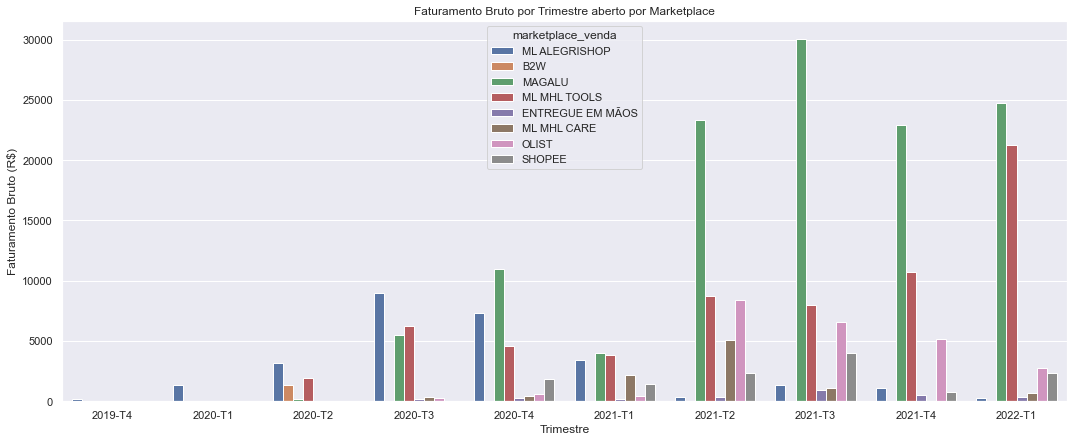

In [144]:
#Faturamento por Trimestre aberto por marketplace
plt.figure(figsize=(18,7))
q8_plot_mkt = sns.barplot (x = df_q8_mkt['quarter_venda'], y=df_q8_mkt['preco_venda'],hue=df_q8_mkt['marketplace_venda'] );
q8_plot_mkt
q8_plot_mkt.set_title('Faturamento Bruto por Trimestre aberto por Marketplace');
q8_plot_mkt.set_ylabel('Faturamento Bruto (R$)');
q8_plot_mkt.set_xlabel('Trimestre');

In [134]:
#Faturamento por Trimestre aberto por marketplace unificado
df_q8_mktuni = df4[['quarter_venda','marketplace_unificado','preco_venda']].groupby(['quarter_venda','marketplace_unificado']).sum().reset_index()
df_q8_mktuni

,quarter_venda,marketplace_unificado,preco_venda
0,2019-T4,MERCADO LIVRE,169.80
1,2020-T1,MERCADO LIVRE,1314.50
2,2020-T2,B2W,1389.20
3,2020-T2,MAGALU,174.70
4,2020-T2,MERCADO LIVRE,5120.70
...,...,...,...
34,2022-T1,ENTREGUE EM MÃOS,350.34
35,2022-T1,MAGALU,24754.04
36,2022-T1,MERCADO LIVRE,22207.82
37,2022-T1,OLIST,2767.71


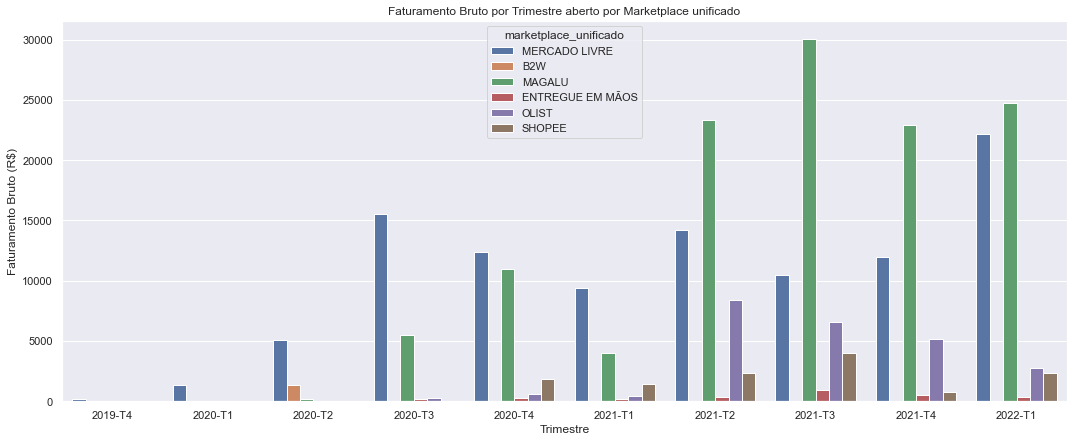

In [143]:
#Faturamento por Trimestre aberto por marketplace unificado
plt.figure(figsize=(18,7))
q8_plot_mktuni = sns.barplot (x = df_q8_mktuni['quarter_venda'], y=df_q8_mktuni['preco_venda'],hue=df_q8_mktuni['marketplace_unificado'] );
q8_plot_mktuni.set_title('Faturamento Bruto por Trimestre aberto por Marketplace unificado');
q8_plot_mktuni.set_ylabel('Faturamento Bruto (R$)');
q8_plot_mktuni.set_xlabel('Trimestre');

In [137]:
#Faturamento por Mês
df_q8_mes = df4[['ano_mes_venda', 'preco_venda']].groupby('ano_mes_venda').sum().reset_index()
df_q8_mes

,ano_mes_venda,preco_venda
0,2019-12,169.80
1,2020-01,44.90
2,2020-02,499.80
3,2020-03,769.80
4,2020-04,310.50
5,2020-05,1709.00
6,2020-06,4665.10
7,2020-07,6151.89
8,2020-08,10405.23
9,2020-09,4992.50


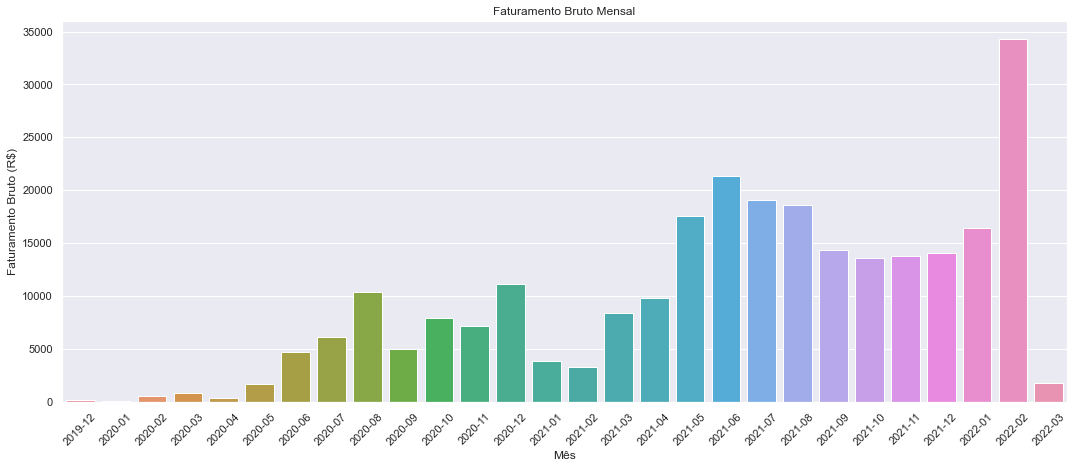

In [142]:
#Faturamento por Mês
plt.figure(figsize=(18,7))
q8_plot_mes = sns.barplot (x = df_q8_mes['ano_mes_venda'], y=df_q8_mes['preco_venda'] );
q8_plot_mes.set_title('Faturamento Bruto Mensal');
q8_plot_mes.set_ylabel('Faturamento Bruto (R$)');
q8_plot_mes.set_xlabel('Mês');
q8_plot_mes.tick_params(axis='x', rotation=45)

R: Confome gráficos acima

### [9] - Qual foi o lucro por trimeste? E por mês?

In [147]:
#Lucro por trimeste
df_q9 = df4[['quarter_venda','lucro_venda']].groupby('quarter_venda').sum().reset_index()
df_q9

,quarter_venda,lucro_venda
0,2019-T4,33.98
1,2020-T1,222.44
2,2020-T2,621.38
3,2020-T3,2290.17
4,2020-T4,3756.13
5,2021-T1,2172.58
6,2021-T2,7164.73
7,2021-T3,7858.79
8,2021-T4,2323.65
9,2022-T1,-15820.65


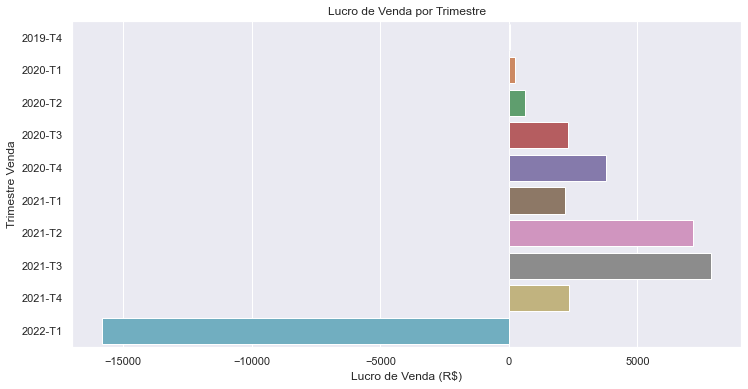

In [162]:
#Lucro por trimeste
q9_plot = sns.barplot( x=df_q9['lucro_venda'], y=df_q9['quarter_venda'] )
q9_plot.set_title("Lucro de Venda por Trimestre");
q9_plot.set_xlabel("Lucro de Venda (R$)");
q9_plot.set_ylabel("Trimestre Venda");

In [154]:
#Lucro por trimeste aberto por marketplace
df_q9_mkt = df3[['quarter_venda','marketplace_venda','lucro_venda']].groupby(['quarter_venda','marketplace_venda']).sum().reset_index()
df_q9_mkt

,quarter_venda,marketplace_venda,lucro_venda
0,2019-T4,ML ALEGRISHOP,33.98
1,2020-T1,ML ALEGRISHOP,222.44
2,2020-T2,B2W,23.21
3,2020-T2,MAGALU,45.90
4,2020-T2,ML ALEGRISHOP,333.41
...,...,...,...
49,2022-T1,ML ALEGRISHOP,-204.53
50,2022-T1,ML MHL CARE,-48.60
51,2022-T1,ML MHL TOOLS,-6503.71
52,2022-T1,OLIST,-768.63


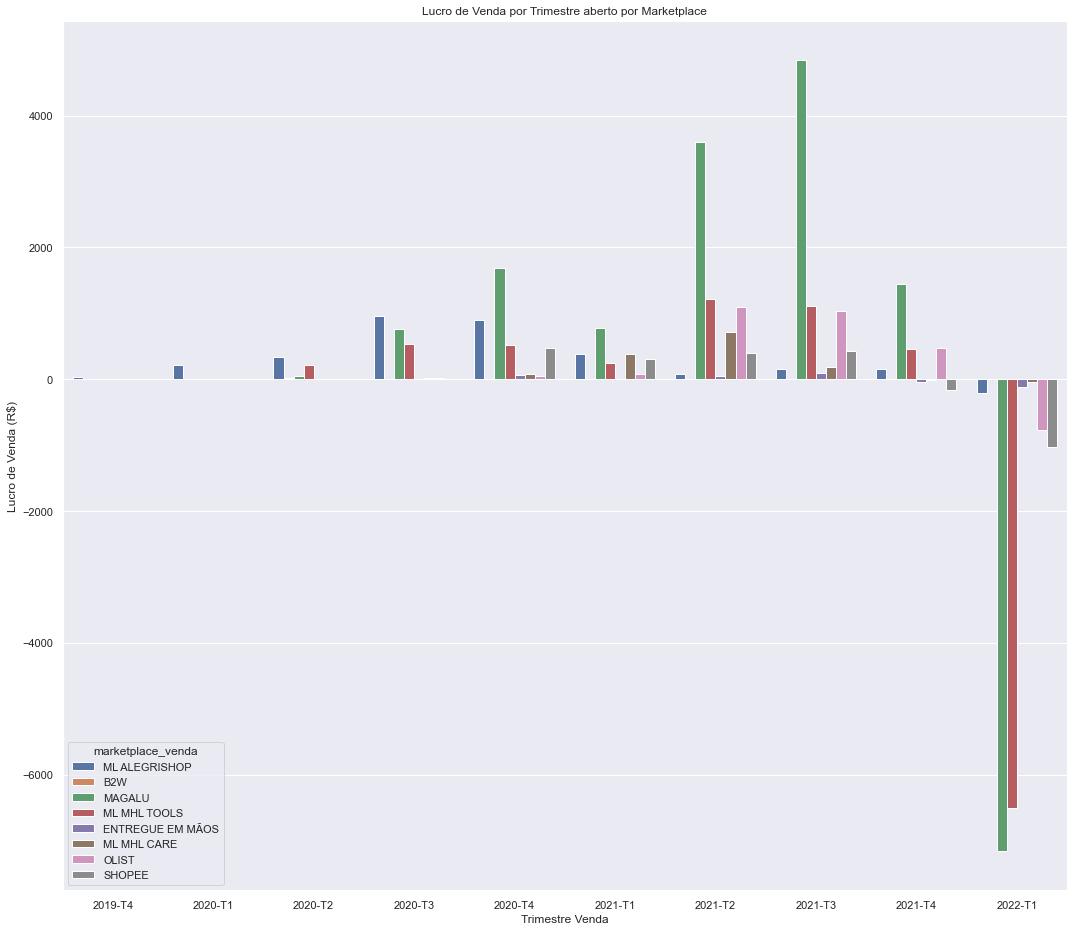

In [169]:
#Lucro por trimeste aberto por marketplace
plt.figure(figsize=(18,16))
q9_plt_mkt = sns.barplot( x=df_q9_mkt['quarter_venda'], y=df_q9_mkt['lucro_venda'], hue=df_q9_mkt['marketplace_venda'] )
q9_plt_mkt.set_title("Lucro de Venda por Trimestre aberto por Marketplace");
q9_plt_mkt.set_xlabel("Trimestre Venda");
q9_plt_mkt.set_ylabel("Lucro de Venda (R$)");

In [164]:
#Lucro por trimeste aberto por marketplace unificado
df_q9_mktuni = df3[['quarter_venda','marketplace_unificado','lucro_venda']].groupby(['quarter_venda','marketplace_unificado']).sum().reset_index()
df_q9_mktuni

,quarter_venda,marketplace_unificado,lucro_venda
0,2019-T4,MERCADO LIVRE,33.98
1,2020-T1,MERCADO LIVRE,222.44
2,2020-T2,B2W,23.21
3,2020-T2,MAGALU,45.90
4,2020-T2,MERCADO LIVRE,552.27
...,...,...,...
34,2022-T1,ENTREGUE EM MÃOS,-116.14
35,2022-T1,MAGALU,-7157.40
36,2022-T1,MERCADO LIVRE,-6756.84
37,2022-T1,OLIST,-768.63


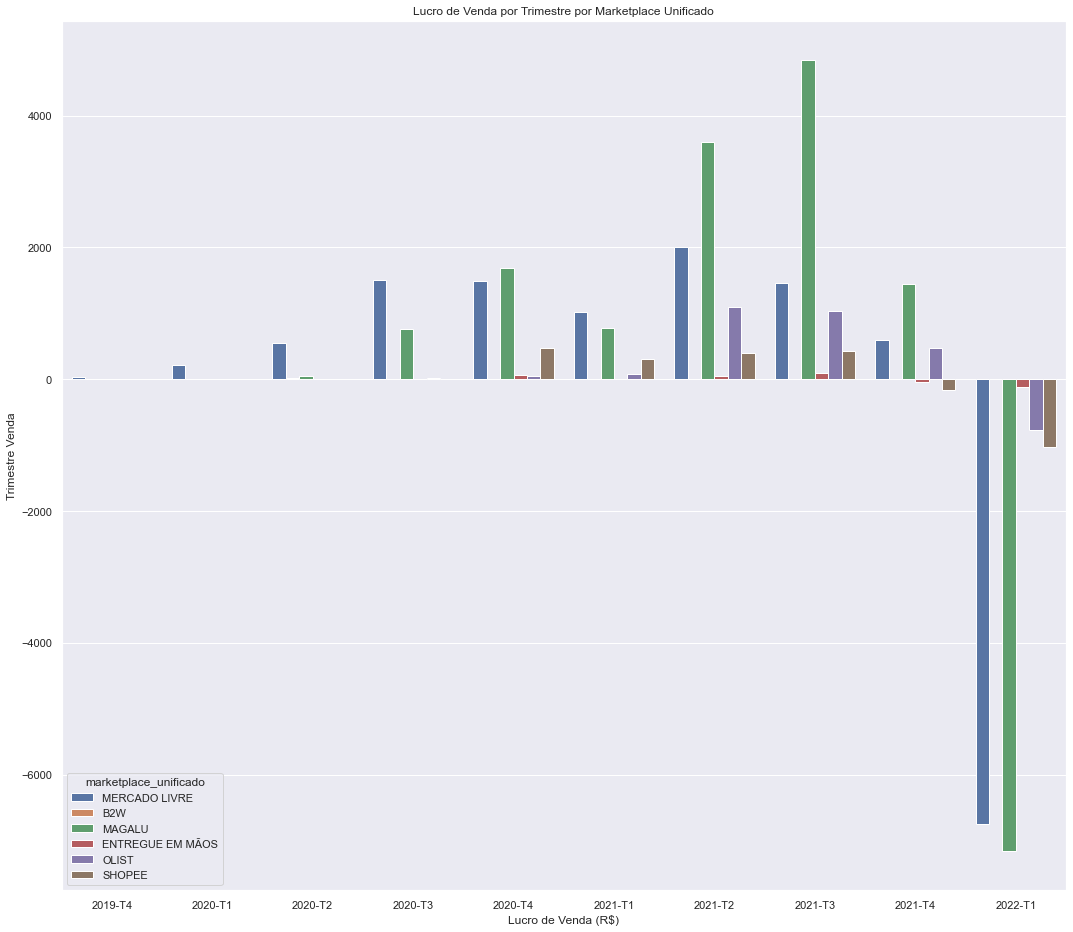

In [168]:
#Lucro por trimeste aberto por marketplace unificado
plt.figure(figsize=(18,16))
q9_plot_mktuni = sns.barplot( x=df_q9_mktuni['quarter_venda'], y=df_q9_mktuni['lucro_venda'], hue=df_q9_mktuni['marketplace_unificado'] )
q9_plot_mktuni.set_title("Lucro de Venda por Trimestre por Marketplace Unificado");
q9_plot_mktuni.set_xlabel("Lucro de Venda (R$)");
q9_plot_mktuni.set_ylabel("Trimestre Venda");

In [173]:
#lucro por mês
df_q9_mes = df4[['ano_mes_venda','lucro_venda']].groupby('ano_mes_venda').sum().reset_index()
df_q9_mes.head()

,ano_mes_venda,lucro_venda
0,2019-12,33.98
1,2020-01,4.40
2,2020-02,95.78
3,2020-03,122.26
4,2020-04,45.67


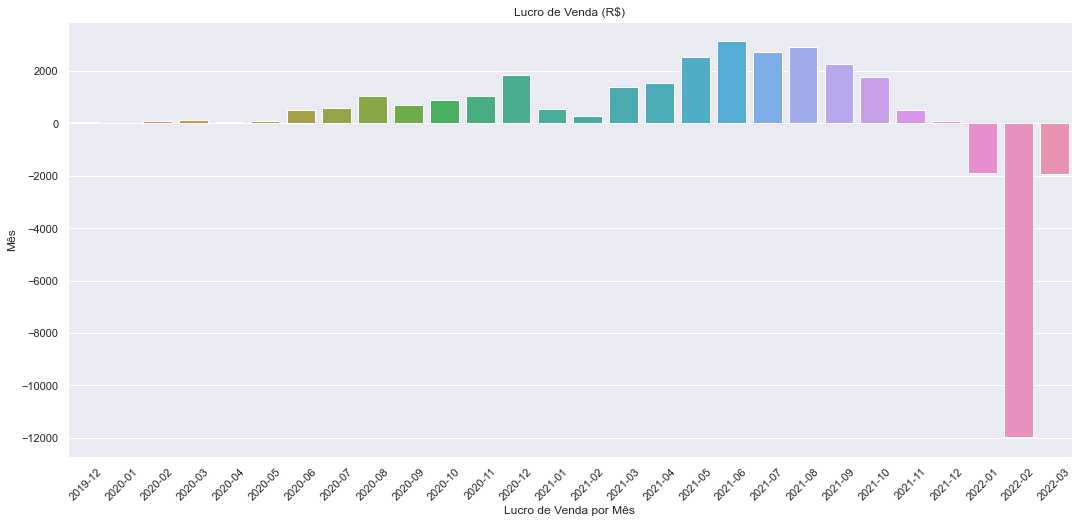

In [180]:
#Lucro por mês
plt.figure(figsize=(18,8))
q9_plot = sns.barplot( x=df_q9_mes['ano_mes_venda'], y=df_q9_mes['lucro_venda'] )
q9_plot.set_title("Lucro de Venda (R$)");
q9_plot.set_xlabel("Lucro de Venda por Mês");
q9_plot.set_ylabel("Mês");
q9_plot.tick_params(axis='x', rotation=45)

R: Conforme gráficos acima.